# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub
import os
import shutil

# Download dataset to temporary location
temp_path = kagglehub.dataset_download("mrigaankjaswal/crop-yield-prediction-dataset")
print("Dataset downloaded to temporary location:", temp_path)

# Buat direktori tujuan jika belum ada
destination_path = "/content/drive/MyDrive/Colab Notebooks/Tugas2ML/"
os.makedirs(destination_path, exist_ok=True)

# Pindahkan file dari lokasi temp ke Google Drive
for file in os.listdir(temp_path):
    source_file = os.path.join(temp_path, file)
    destination_file = os.path.join(destination_path, file)
    shutil.copy2(source_file, destination_file)
    print(f"Copied {file} to {destination_path}")

print("Dataset successfully saved to Google Drive path:", destination_path)

'\nimport kagglehub\nimport os\nimport shutil\n\n# Download dataset to temporary location\ntemp_path = kagglehub.dataset_download("mrigaankjaswal/crop-yield-prediction-dataset")\nprint("Dataset downloaded to temporary location:", temp_path)\n\n# Buat direktori tujuan jika belum ada\ndestination_path = "/content/drive/MyDrive/Colab Notebooks/Tugas2ML/"\nos.makedirs(destination_path, exist_ok=True)\n\n# Pindahkan file dari lokasi temp ke Google Drive\nfor file in os.listdir(temp_path):\n    source_file = os.path.join(temp_path, file)\n    destination_file = os.path.join(destination_path, file)\n    shutil.copy2(source_file, destination_file)\n    print(f"Copied {file} to {destination_path}")\n\nprint("Dataset successfully saved to Google Drive path:", destination_path)\n'

# 1. EDA

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/Tugas2ML/yield_df.csv"
df = pd.read_csv(data_path)

In [ ]:
# Melihat 5 baris pertama data
print("5 baris pertama data:")
print(df.head())

5 baris pertama data:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [ ]:
# Menghapus kolom Unnamed jika ada
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
if unnamed_cols:
    df = df.drop(columns=unnamed_cols)
    print(f"Kolom yang dihapus: {unnamed_cols}")

Kolom yang dihapus: ['Unnamed: 0']


In [ ]:
# Melihat informasi umum dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
               Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticides_tonnes      avg_temp  
count       28242.000000  28242.000000  
mean        37076.909344     20.542627  
std         59958.784665      6.312051  
min             0.040000      1.300000  
25%          1702.000000     16.702500  
50%         17529.440000     21.510000  
75%         48687.880000     26.000000  
max        367778.000000   

In [ ]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [ ]:
# Cek jumlah nilai unik pada kolom kategorikal
print("Jumlah nilai unik pada kolom kategorikal:")
print(f"Jumlah negara (Area): {df['Area'].nunique()}")
print(f"Jumlah jenis tanaman (Item): {df['Item'].nunique()}")
print(f"Rentang tahun: {df['Year'].min()} - {df['Year'].max()}")

# Menampilkan 10 negara dengan data terbanyak
print("\n10 negara dengan data terbanyak:")
print(df['Area'].value_counts().head(10))

# Menampilkan 10 jenis tanaman dengan data terbanyak
print("\n10 jenis tanaman dengan data terbanyak:")
print(df['Item'].value_counts().head(10))

Jumlah nilai unik pada kolom kategorikal:
Jumlah negara (Area): 101
Jumlah jenis tanaman (Item): 10
Rentang tahun: 1990 - 2013

10 negara dengan data terbanyak:
Area
India           4048
Brazil          2277
Mexico          1472
Pakistan        1449
Australia        966
Japan            966
Indonesia        828
South Africa     644
Turkey           625
Ecuador          621
Name: count, dtype: int64

10 jenis tanaman dengan data terbanyak:
Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


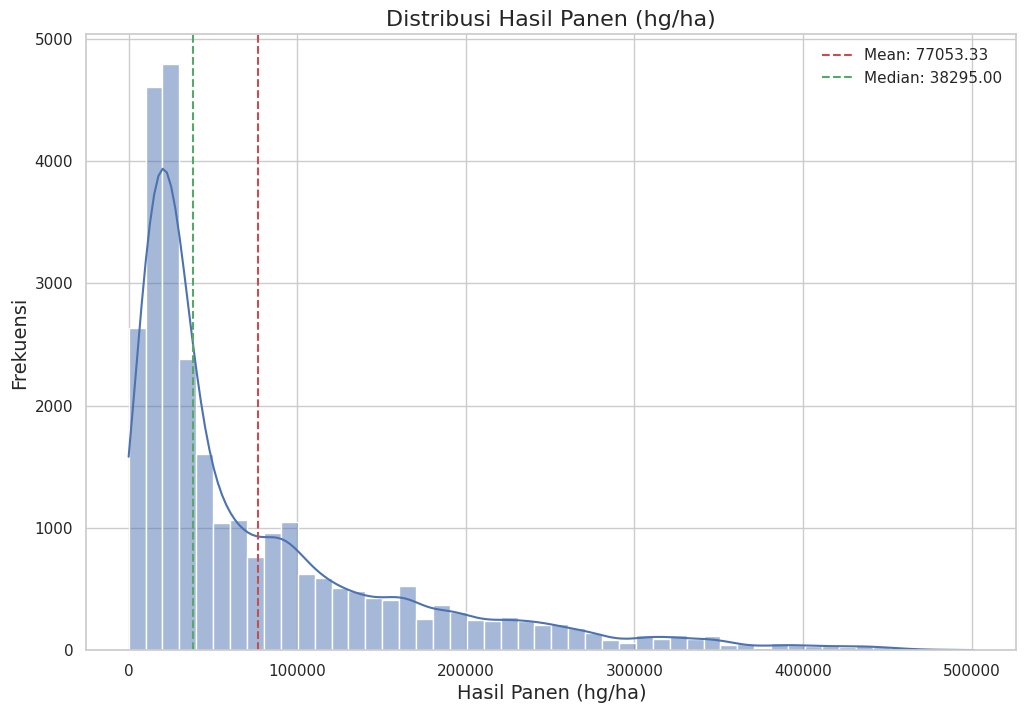

In [ ]:
# Visualisasi distribusi target (hasil panen)
plt.figure(figsize=(12, 8))
sns.histplot(df['hg/ha_yield'], kde=True, bins=50)
plt.title('Distribusi Hasil Panen (hg/ha)', fontsize=16)
plt.xlabel('Hasil Panen (hg/ha)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.axvline(df['hg/ha_yield'].mean(), color='r', linestyle='--',
            label=f'Mean: {df["hg/ha_yield"].mean():.2f}')
plt.axvline(df['hg/ha_yield'].median(), color='g', linestyle='--',
            label=f'Median: {df["hg/ha_yield"].median():.2f}')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/distribusi_hasil_panen.png')
plt.show()

Dari grafik ini dapat disimpulkan bahwa distribusi hasil panen cenderung condong ke kanan (right-skewed) karena:

Mayoritas data terkumpul di rentang nilai yang lebih rendah (0-100.000 hg/ha)
Nilai mean (77.053,33) lebih besar dari median (38.295,00)
Ada beberapa nilai ekstrem di sebelah kanan yang menarik kurva distribusi

Frekuensi tertinggi berada di rentang sekitar 20.000-40.000 hg/ha, menunjukkan bahwa sebagian besar pengamatan memiliki hasil panen dalam rentang tersebut.

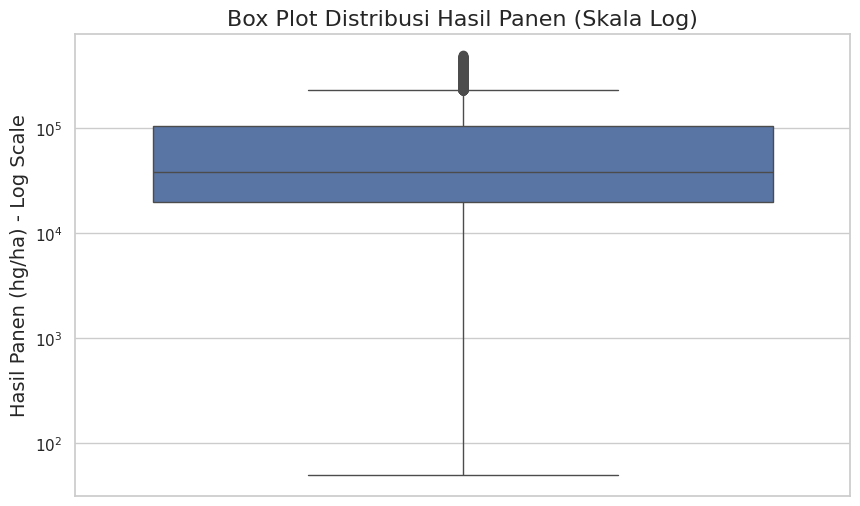

In [ ]:
# Box plot distribusi hasil panen (dengan skala log untuk visualisasi yang lebih baik)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['hg/ha_yield'])
plt.yscale('log')
plt.title('Box Plot Distribusi Hasil Panen (Skala Log)', fontsize=16)
plt.ylabel('Hasil Panen (hg/ha) - Log Scale', fontsize=14)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/boxplot_hasil_panen.png')
plt.show()

Dari box plot ini, kita dapat menyimpulkan:

Sebagian besar hasil panen berada di rentang 10.000 hingga 100.000 hg/ha (10⁴ hingga 10⁵)
Terdapat beberapa hasil panen yang sangat rendah (sekitar 500 hg/ha)
Ada beberapa outlier dengan hasil panen yang sangat tinggi
Distribusi cenderung miring ke kanan (right-skewed) karena whisker atas lebih panjang daripada whisker bawah

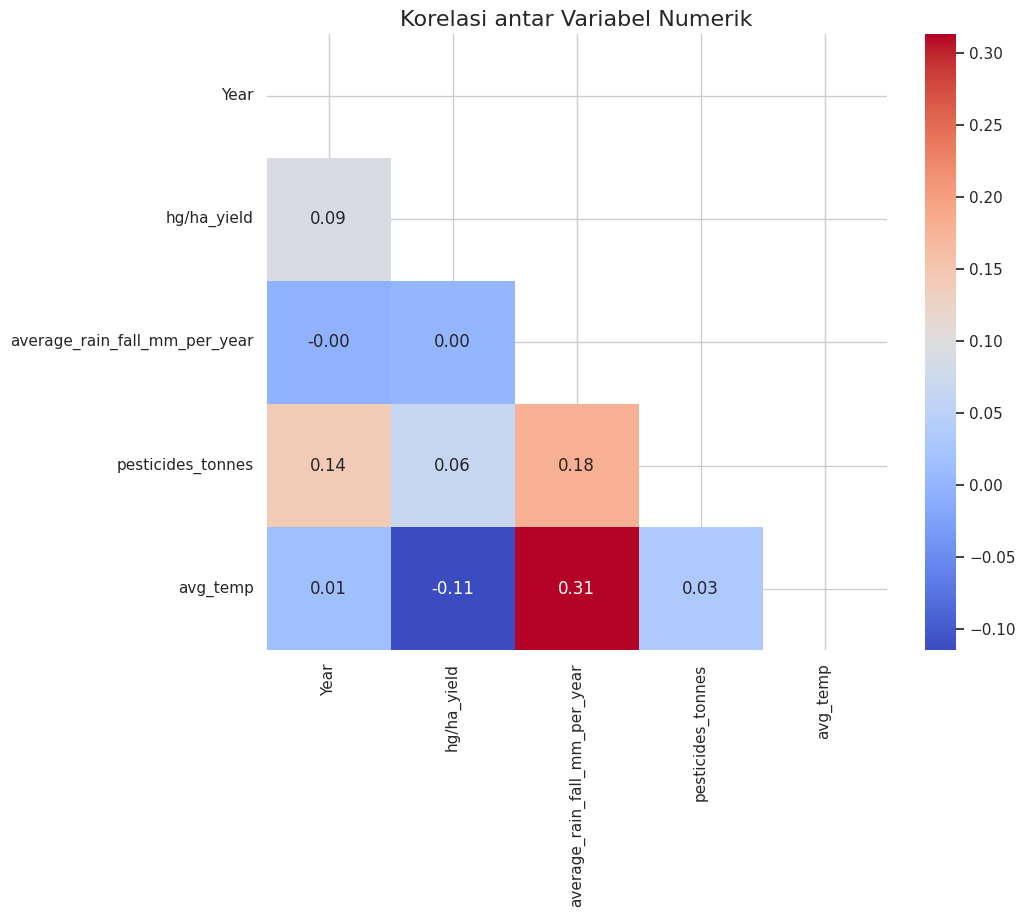

In [ ]:
# Korelasi antar variabel numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Korelasi antar Variabel Numerik', fontsize=16)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/korelasi.png')
plt.show()

Secara umum, korelasi antara variabel target (hasil panen) dan variabel prediktor (curah hujan, suhu, pestisida) relatif lemah, menunjukkan bahwa hubungan mungkin tidak sepenuhnya linear.
Korelasi terkuat dalam dataset adalah antara suhu rata-rata dan penggunaan pestisida (0.31).
Suhu memiliki korelasi negatif lemah dengan hasil panen (-0.11), mengindikasikan bahwa suhu yang lebih tinggi mungkin sedikit menurunkan produktivitas tanaman.
Kurangnya korelasi yang kuat menunjukkan bahwa mungkin ada hubungan non-linear atau interaksi kompleks yang tidak tertangkap oleh analisis korelasi sederhana ini, yang mendukung penggunaan model polynomial daripada linear.

Heat map ini memberikan gambaran awal tentang hubungan antar variabel dan dapat membantu dalam pemilihan fitur serta interpretasi model yang akan dibangun.

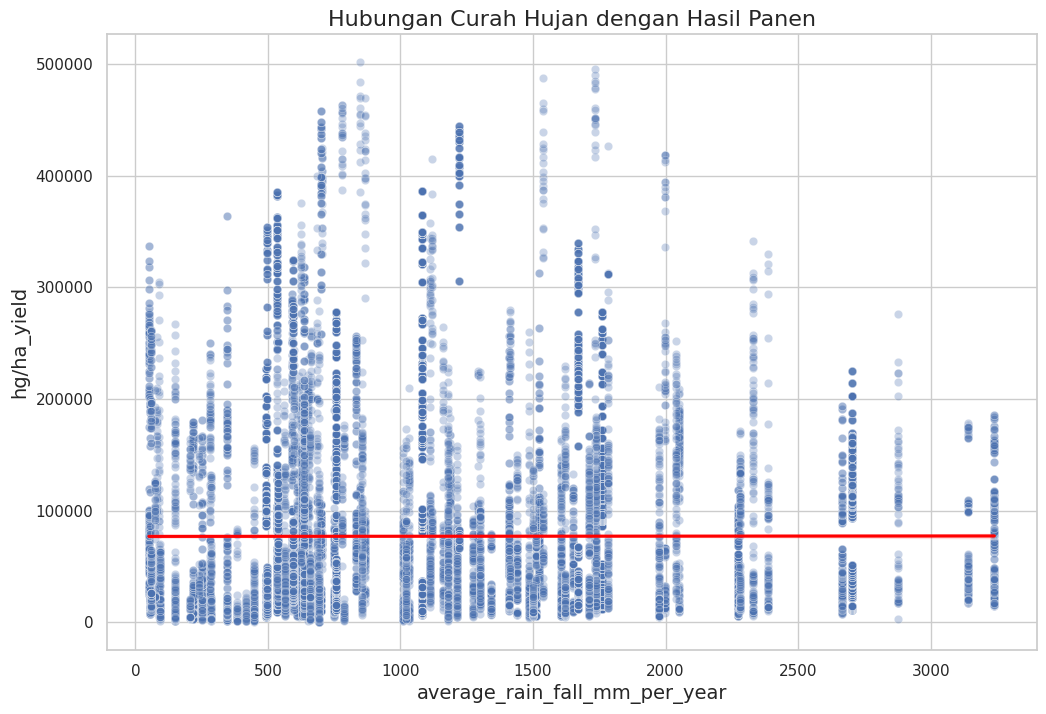

In [ ]:
# Scatter plot untuk melihat hubungan antara curah hujan dengan hasil panen
plt.figure(figsize=(12, 8))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df, alpha=0.3)
plt.title('Hubungan Curah Hujan dengan Hasil Panen', fontsize=16)
plt.xlabel('Curah Hujan Tahunan (mm)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)

# Tambahkan regression line
sns.regplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield',
           data=df, scatter=False, color='red')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/curah_hujan_vs_hasil.png')
plt.show()

plot ini tidak menunjukkan adanya korelasi yang kuat antara curah hujan dan hasil panen. Jika terdapat korelasi positif yang kuat, kita akan melihat titik-titik data membentuk pola diagonal dari kiri bawah ke kanan atas (semakin tinggi curah hujan, semakin tinggi hasil panen). Jika terdapat korelasi negatif yang kuat, titik-titik akan membentuk pola diagonal dari kiri atas ke kanan bawah.
Namun, yang terlihat pada plot ini adalah persebaran titik yang sangat acak dan tidak membentuk pola tertentu. Titik-titik data tersebar hampir merata di seluruh area plot. Hal ini sejalan dengan nilai korelasi yang mendekati nol (0.00) yang kita lihat pada heat map korelasi sebelumnya.
Mengenai garis merah pada plot, itu adalah regression line atau garis regresi linear yang mencoba memodelkan hubungan linear antara kedua variabel. Garis ini hampir horizontal, yang menegaskan bahwa nyaris tidak ada hubungan linear antara curah hujan dan hasil panen. Kemiringan garis yang sangat kecil menunjukkan bahwa perubahan pada curah hujan hampir tidak mempengaruhi hasil panen secara linear.
Kesimpulan yang dapat diambil:

Tidak ada hubungan linear yang jelas antara curah hujan dan hasil panen
Hasil panen yang tinggi maupun rendah dapat terjadi pada berbagai tingkat curah hujan
Mungkin ada faktor-faktor lain yang lebih berpengaruh terhadap hasil panen
Kemungkinan hubungan antara curah hujan dan hasil panen bersifat non-linear atau lebih kompleks (misalnya, ada titik optimal curah hujan, di mana terlalu sedikit atau terlalu banyak hujan sama-sama tidak baik)

Hal ini juga menunjukkan bahwa model regresi linear mungkin tidak cukup untuk menangkap hubungan yang kompleks antara curah hujan dan hasil panen, sehingga mendukung kebutuhan untuk mencoba model polynomial.

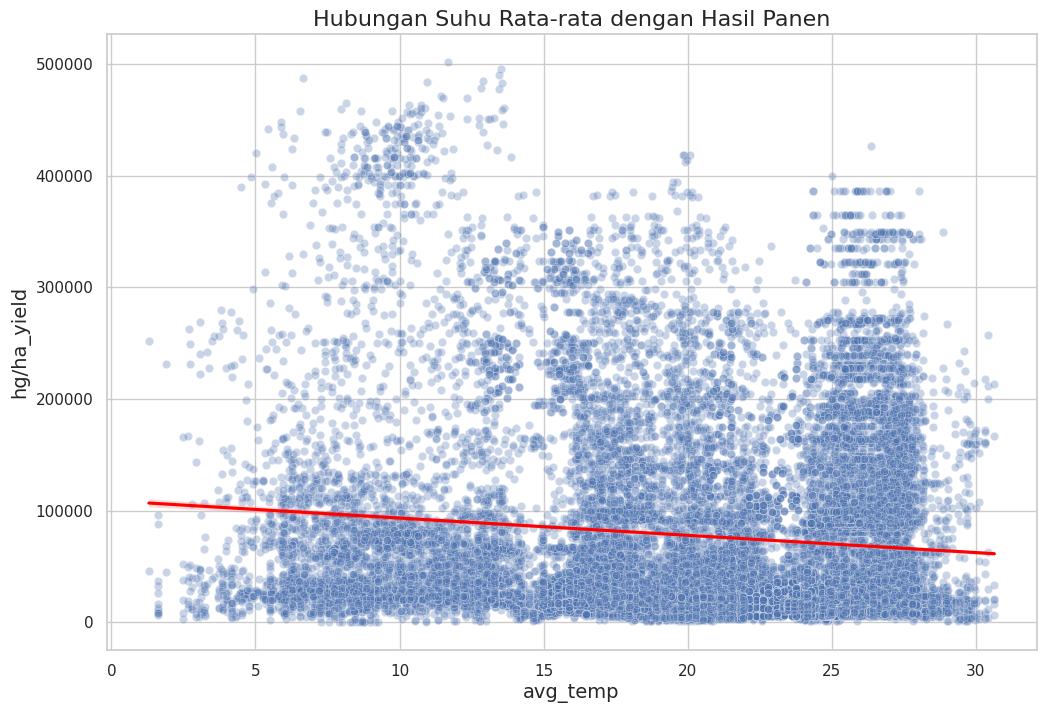

In [ ]:
# Scatter plot untuk melihat hubungan antara suhu rata-rata dengan hasil panen
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df, alpha=0.3)
plt.title('Hubungan Suhu Rata-rata dengan Hasil Panen', fontsize=16)
plt.xlabel('Suhu Rata-rata (°C)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)

# Tambahkan regression line
sns.regplot(x='avg_temp', y='hg/ha_yield',
           data=df, scatter=False, color='red')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/suhu_vs_hasil.png')
plt.show()

Plot menunjukkan hubungan negatif lemah antara suhu rata-rata dan hasil panen. Garis regresi merah yang menurun mengindikasikan bahwa semakin tinggi suhu, cenderung semakin rendah hasil panen. Namun, persebaran data yang sangat luas menunjukkan bahwa hubungan ini tidak terlalu kuat dan banyak faktor lain yang mungkin mempengaruhi hasil panen.

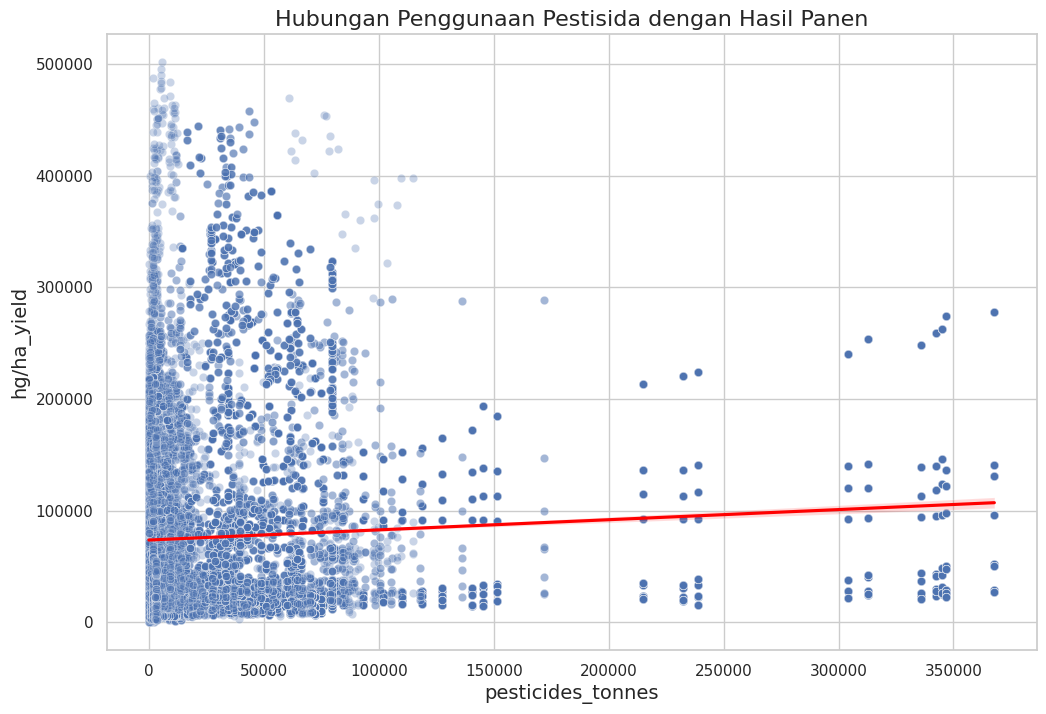

In [ ]:
# Scatter plot untuk melihat hubungan antara penggunaan pestisida dengan hasil panen
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=df, alpha=0.3)
plt.title('Hubungan Penggunaan Pestisida dengan Hasil Panen', fontsize=16)
plt.xlabel('Penggunaan Pestisida (tonnes)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)

# Tambahkan regression line
sns.regplot(x='pesticides_tonnes', y='hg/ha_yield',
           data=df, scatter=False, color='red')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/pestisida_vs_hasil.png')
plt.show()

Plot ini menunjukkan hubungan positif lemah antara penggunaan pestisida dan hasil panen. Garis regresi merah yang sedikit meningkat menandakan bahwa ada kecenderungan hasil panen yang lebih tinggi dengan penggunaan pestisida yang lebih banyak. Namun, sebagian besar data terkonsentrasi di bagian kiri grafik (penggunaan pestisida rendah), dengan beberapa titik data yang tersebar jauh di sisi kanan.

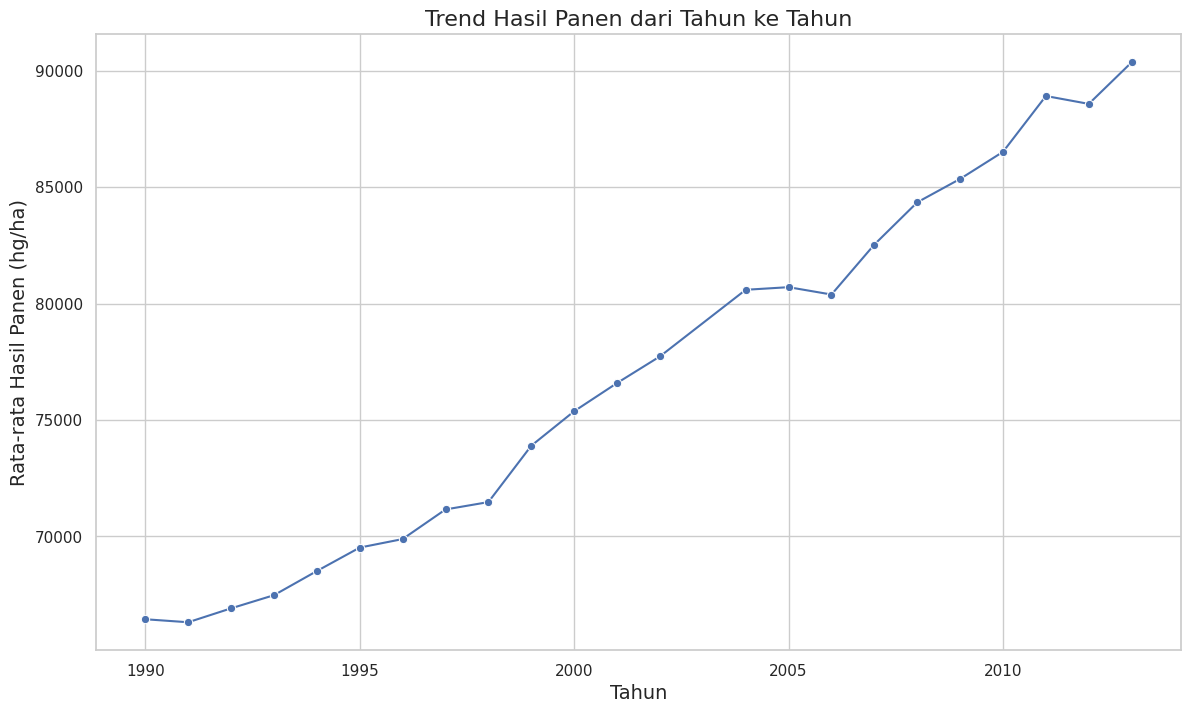

In [ ]:
# Trend hasil panen dari waktu ke waktu
yearly_yield = df.groupby('Year')['hg/ha_yield'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='hg/ha_yield', data=yearly_yield, marker='o')
plt.title('Trend Hasil Panen dari Tahun ke Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Rata-rata Hasil Panen (hg/ha)', fontsize=14)
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/trend_hasil_panen.png')
plt.show()

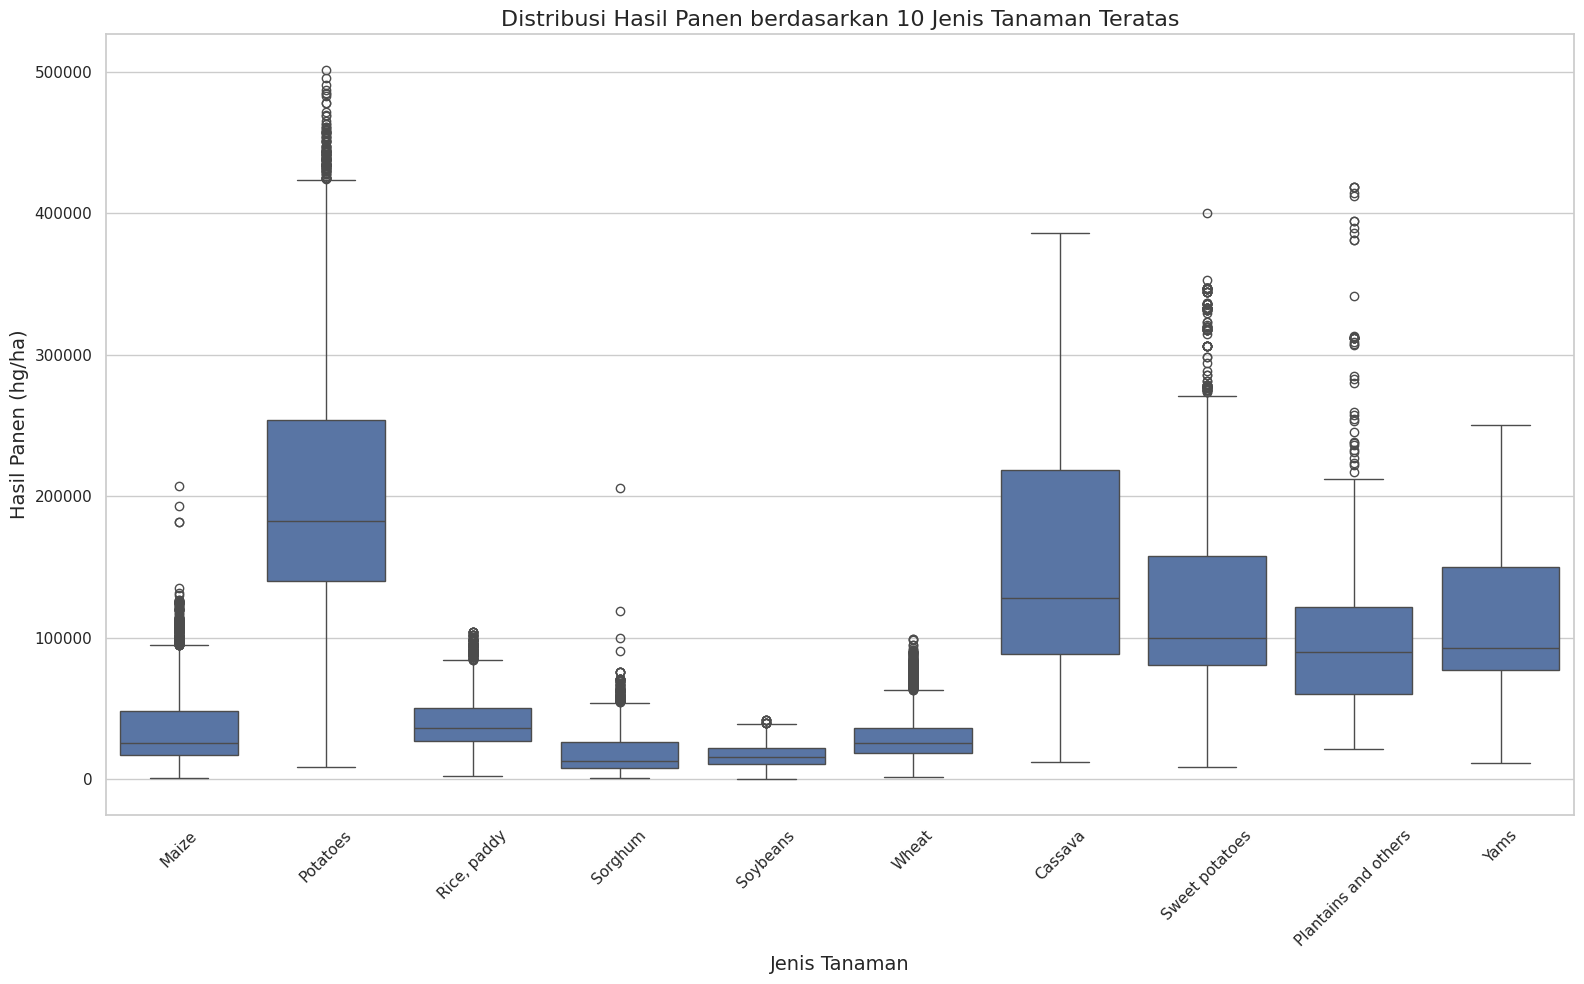

In [ ]:
# Box plot untuk melihat distribusi hasil panen berdasarkan jenis tanaman (ambil 10 tanaman teratas)
top_crops = df.groupby('Item')['hg/ha_yield'].mean().nlargest(10).index
plt.figure(figsize=(16, 10))
sns.boxplot(x='Item', y='hg/ha_yield', data=df[df['Item'].isin(top_crops)])
plt.title('Distribusi Hasil Panen berdasarkan 10 Jenis Tanaman Teratas', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Jenis Tanaman', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/hasil_panen_per_tanaman.png')
plt.show()

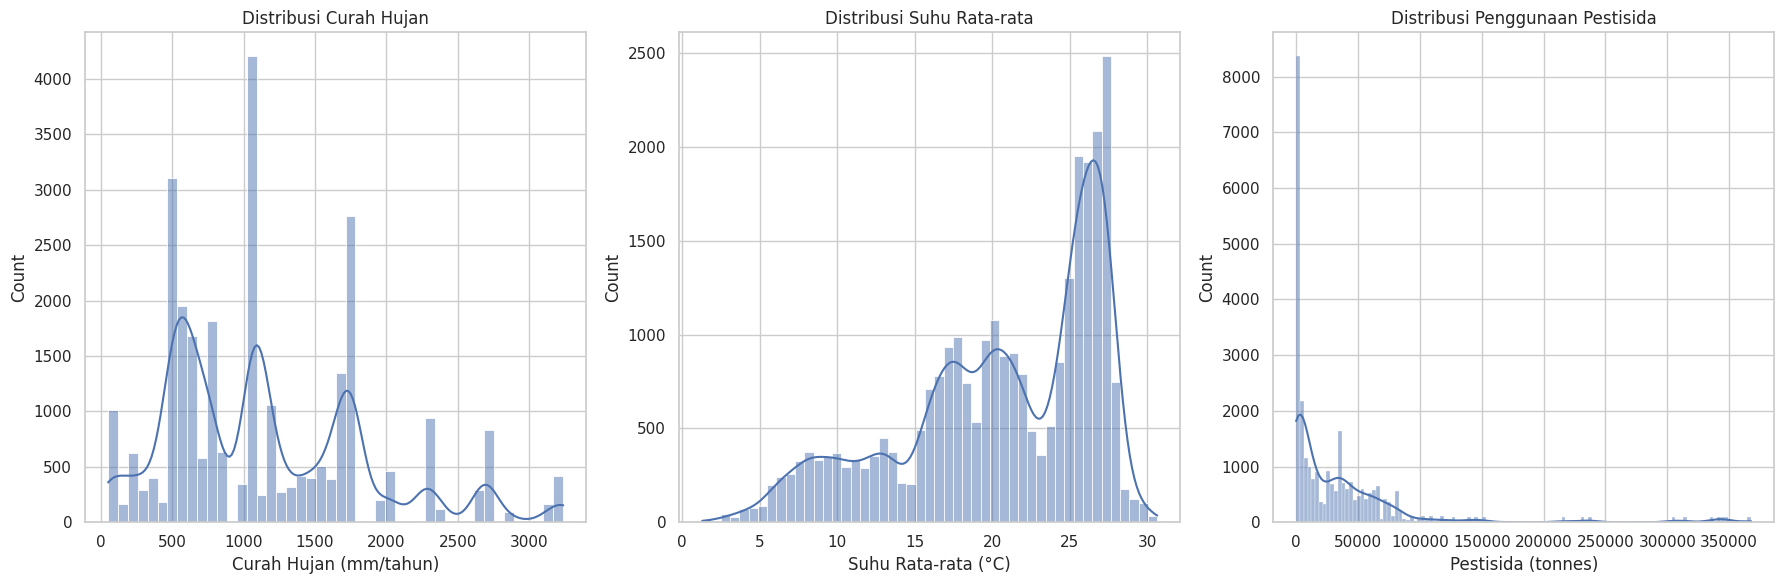

In [ ]:
# Visualisasi distribusi variabel prediktor
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Curah hujan
sns.histplot(df['average_rain_fall_mm_per_year'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribusi Curah Hujan')
axes[0].set_xlabel('Curah Hujan (mm/tahun)')

# Suhu
sns.histplot(df['avg_temp'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribusi Suhu Rata-rata')
axes[1].set_xlabel('Suhu Rata-rata (°C)')

# Pestisida
sns.histplot(df['pesticides_tonnes'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Distribusi Penggunaan Pestisida')
axes[2].set_xlabel('Pestisida (tonnes)')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tugas2ML/distribusi_prediktor.png')
plt.show()

## Hipotesis Pendekatan Segmentasi dalam Pemodelan Hasil Panen

## Latar Belakang

Dalam analisis awal terhadap dataset hasil panen, kami mengidentifikasi tantangan signifikan: korelasi yang relatif rendah antara variabel target (hasil panen) dan prediktor lingkungan (curah hujan, suhu, dan penggunaan pestisida). Pada dataset keseluruhan, korelasi ini sangat lemah:

- Korelasi curah hujan dengan hasil panen: ≈ 0.00
- Korelasi suhu dengan hasil panen: ≈ -0.11
- Korelasi pestisida dengan hasil panen: ≈ 0.06

Rendahnya korelasi ini membatasi potensi model regresi konvensional untuk menghasilkan prediksi yang akurat, mengingat model regresi linear dan polinomial sangat mengandalkan hubungan yang kuat antar variabel.

## Hipotesis Segmentasi

Berdasarkan pertimbangan agronomi dan karakteristik dataset, kami mengembangkan hipotesis bahwa heterogenitas dalam dataset global mengaburkan hubungan yang lebih kuat pada tingkat yang lebih spesifik. Secara khusus, kami mengajukan dua pendekatan segmentasi:

1. **Segmentasi berdasarkan Negara**: Setiap negara memiliki kondisi iklim, praktik pertanian, dan karakteristik geografis yang unik. Dengan mengisolasi data dari negara tertentu (Contoh Albania), kami berharap dapat mengungkap korelasi yang lebih kuat antara faktor lingkungan lokal dan hasil panen.

2. **Segmentasi berdasarkan Tanaman**: Setiap jenis tanaman memiliki respons biologis yang berbeda terhadap kondisi lingkungan. Misalnya, kentang mungkin lebih sensitif terhadap suhu dibandingkan dengan tanaman sereal. Dengan berfokus pada satu jenis tanaman (Kentang), kami berharap dapat mengidentifikasi hubungan spesifik yang mungkin tersamarkan dalam analisis gabungan.

## Justifikasi Pendekatan

Pendekatan segmentasi ini memiliki dasar logis yang kuat:

1. **Homogenitas Ekologi**: Dalam satu negara, kondisi iklim dan tanah cenderung lebih homogen, yang mengurangi variabilitas yang tidak terkait dengan faktor produktivitas utama.

2. **Keseragaman Praktik Pertanian**: Petani dalam satu wilayah geografis sering menggunakan teknik pertanian serupa, mengurangi variabilitas dalam faktor manusia.

3. **Kebutuhan Fisiologis Tanaman**: Setiap jenis tanaman memiliki rentang optimal untuk faktor seperti suhu dan kelembaban. Menganalisis satu jenis tanaman memungkinkan model untuk mengidentifikasi pola dalam kisaran parameter yang relevan.

4. **Kompleksitas Hubungan**: Tugas utama kami adalah mengimplementasikan regresi linear dan polinomial, yang keduanya sangat bergantung pada kekuatan korelasi antara prediktor dan variabel target. Segmentasi memungkinkan model untuk menangkap hubungan yang lebih spesifik dan potensial non-linear.

## EDA Segmented (By Country)


ANALISIS EDA UNTUK ALBANIA
Jumlah data untuk Albania: 99

Statistik deskriptif data Albania:
              Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count    99.000000      99.000000                           99.0   
mean   2000.717172   57692.282828                         1485.0   
std       7.331843   61069.164092                            0.0   
min    1990.000000    3747.000000                         1485.0   
25%    1994.000000   20000.000000                         1485.0   
50%    2000.000000   31862.000000                         1485.0   
75%    2007.000000   66728.500000                         1485.0   
max    2013.000000  260110.000000                         1485.0   

       pesticides_tonnes   avg_temp  
count          99.000000  99.000000  
mean          601.238788  16.300101  
std           397.138194   0.484994  
min           121.000000  15.360000  
25%           201.000000  15.920000  
50%           565.820000  16.370000  
75%           943.610000  1

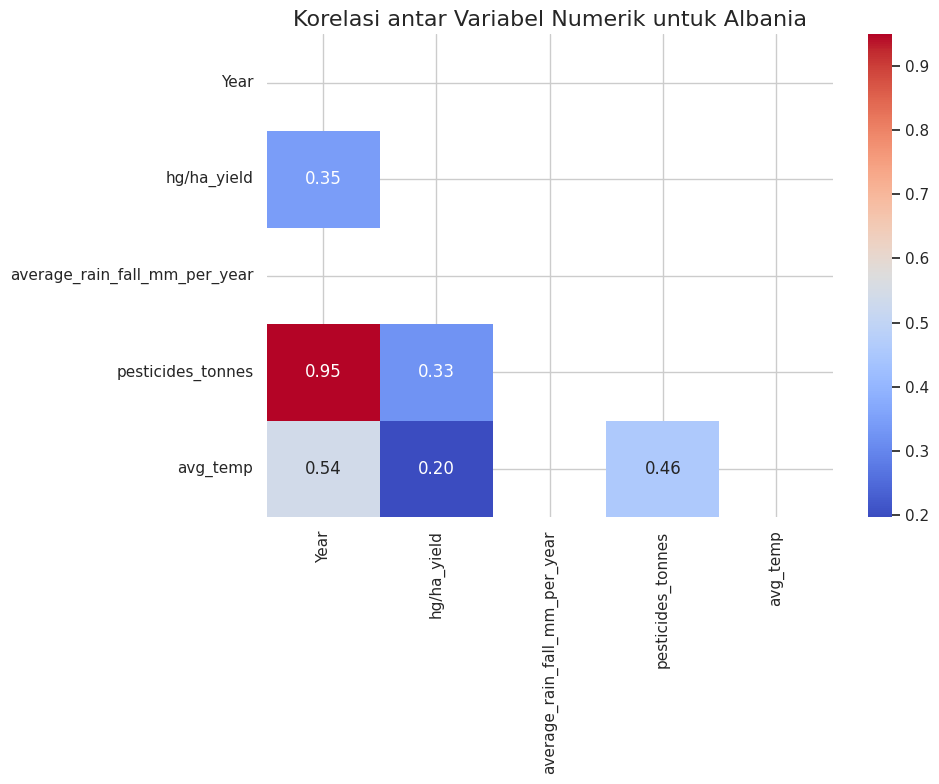

In [ ]:
# Analisis EDA untuk Albania
print(f"\n{'='*50}\nANALISIS EDA UNTUK ALBANIA\n{'='*50}")

# Filter dataset untuk Albania
albania_df = df[df['Area'] == 'Albania'].copy()

# Melihat informasi dasar dataset
print(f"Jumlah data untuk Albania: {len(albania_df)}")

# Statistik deskriptif untuk data Albania
print(f"\nStatistik deskriptif data Albania:")
print(albania_df.describe())

# Melihat jenis tanaman yang ditanam di Albania
crop_counts_albania = albania_df['Item'].value_counts()
print(f"\n10 tanaman dengan data terbanyak di Albania:")
print(crop_counts_albania.head(10))

# Visualisasi korelasi untuk data Albania
numeric_columns = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
correlation_albania = albania_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_albania, dtype=bool))
sns.heatmap(correlation_albania, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Korelasi antar Variabel Numerik untuk Albania', fontsize=16)
plt.tight_layout()
plt.show()

Albania (Segmentasi Negara)

Korelasi Kuat antara Tahun dan Pestisida (0.95): Terdapat hubungan positif yang sangat kuat antara tahun dan penggunaan pestisida di Albania, menunjukkan peningkatan signifikan penggunaan pestisida dari waktu ke waktu.
Korelasi Moderat antara Tahun dan Suhu (0.54): Ada tren peningkatan suhu rata-rata di Albania seiring berjalannya waktu.
Korelasi Lemah-Moderat antara Hasil Panen dan Faktor Lain:

Hasil panen memiliki korelasi positif lemah dengan tahun (0.35)
Hasil panen dan pestisida berkorelasi positif lemah (0.33)
Hasil panen dan suhu berkorelasi positif lemah (0.20)


Data Curah Hujan Konstan: Curah hujan di Albania memiliki nilai yang sama untuk seluruh dataset (standar deviasi = 0), sehingga tidak dapat dihitung korelasinya dengan variabel lain.

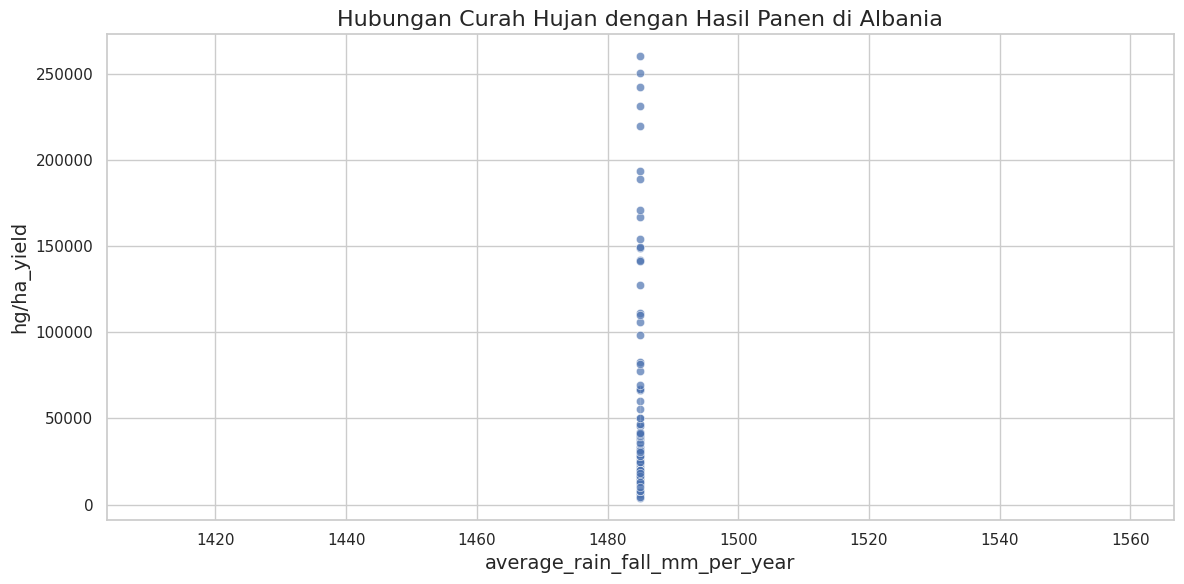

In [ ]:
# Scatter plot hubungan curah hujan dengan hasil panen di Albania
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=albania_df, alpha=0.7)
plt.title('Hubungan Curah Hujan dengan Hasil Panen di Albania', fontsize=16)
plt.xlabel('Curah Hujan Tahunan (mm)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
sns.regplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=albania_df, scatter=False, color='red')
plt.tight_layout()
plt.show()

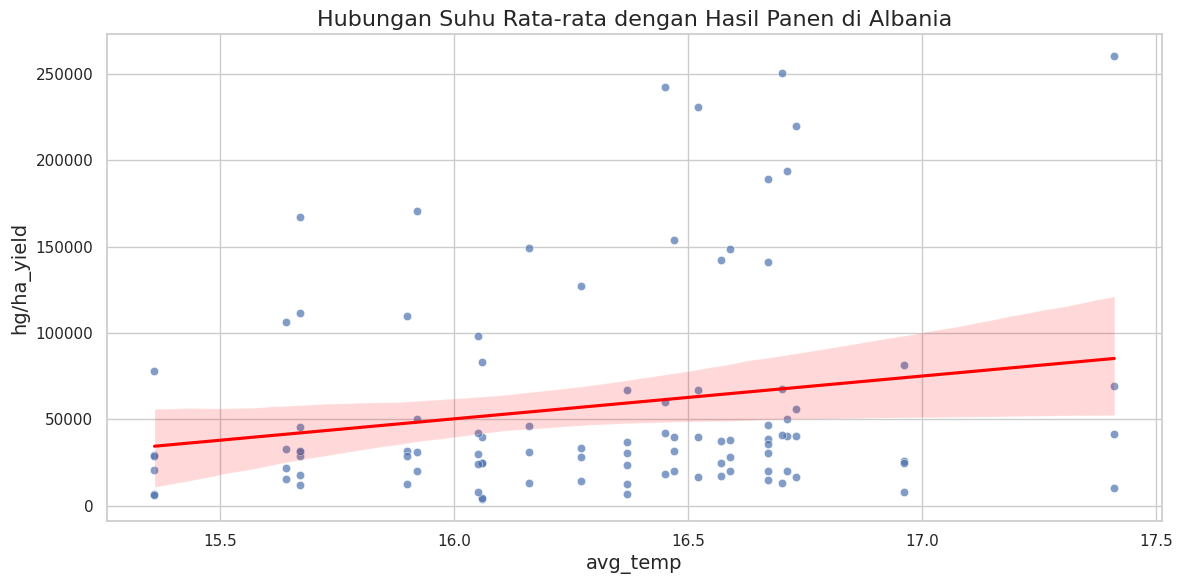

In [ ]:
# Scatter plot hubungan suhu dengan hasil panen di Albania
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=albania_df, alpha=0.7)
plt.title('Hubungan Suhu Rata-rata dengan Hasil Panen di Albania', fontsize=16)
plt.xlabel('Suhu Rata-rata (°C)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
sns.regplot(x='avg_temp', y='hg/ha_yield', data=albania_df, scatter=False, color='red')
plt.tight_layout()
plt.show()

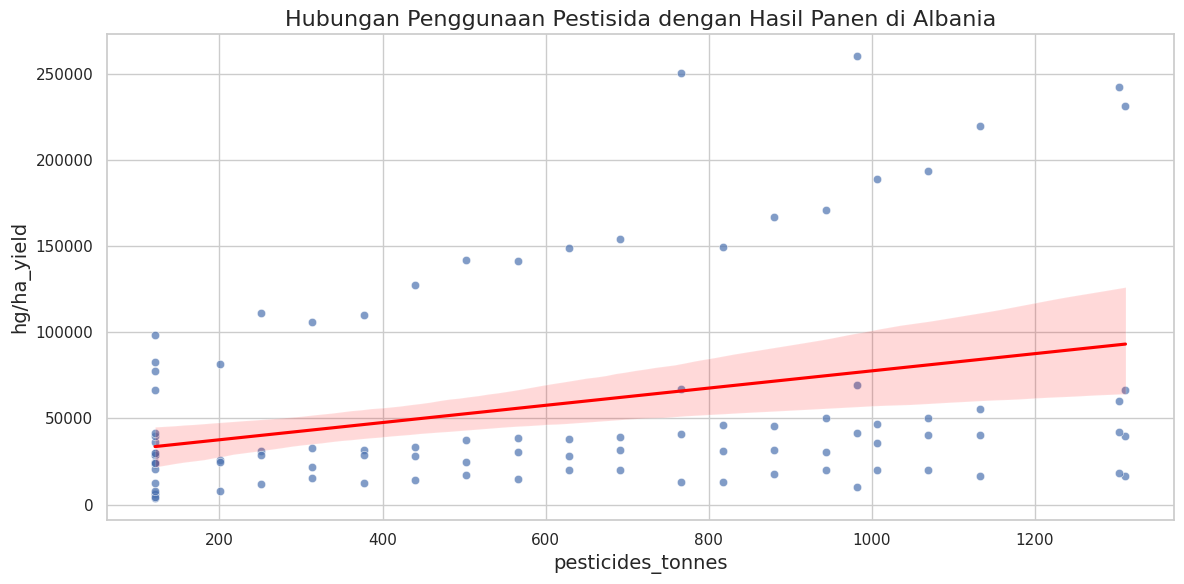

In [ ]:
# Scatter plot hubungan pestisida dengan hasil panen di Albania
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=albania_df, alpha=0.7)
plt.title('Hubungan Penggunaan Pestisida dengan Hasil Panen di Albania', fontsize=16)
plt.xlabel('Penggunaan Pestisida (tonnes)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
sns.regplot(x='pesticides_tonnes', y='hg/ha_yield', data=albania_df, scatter=False, color='red')
plt.tight_layout()
plt.show()

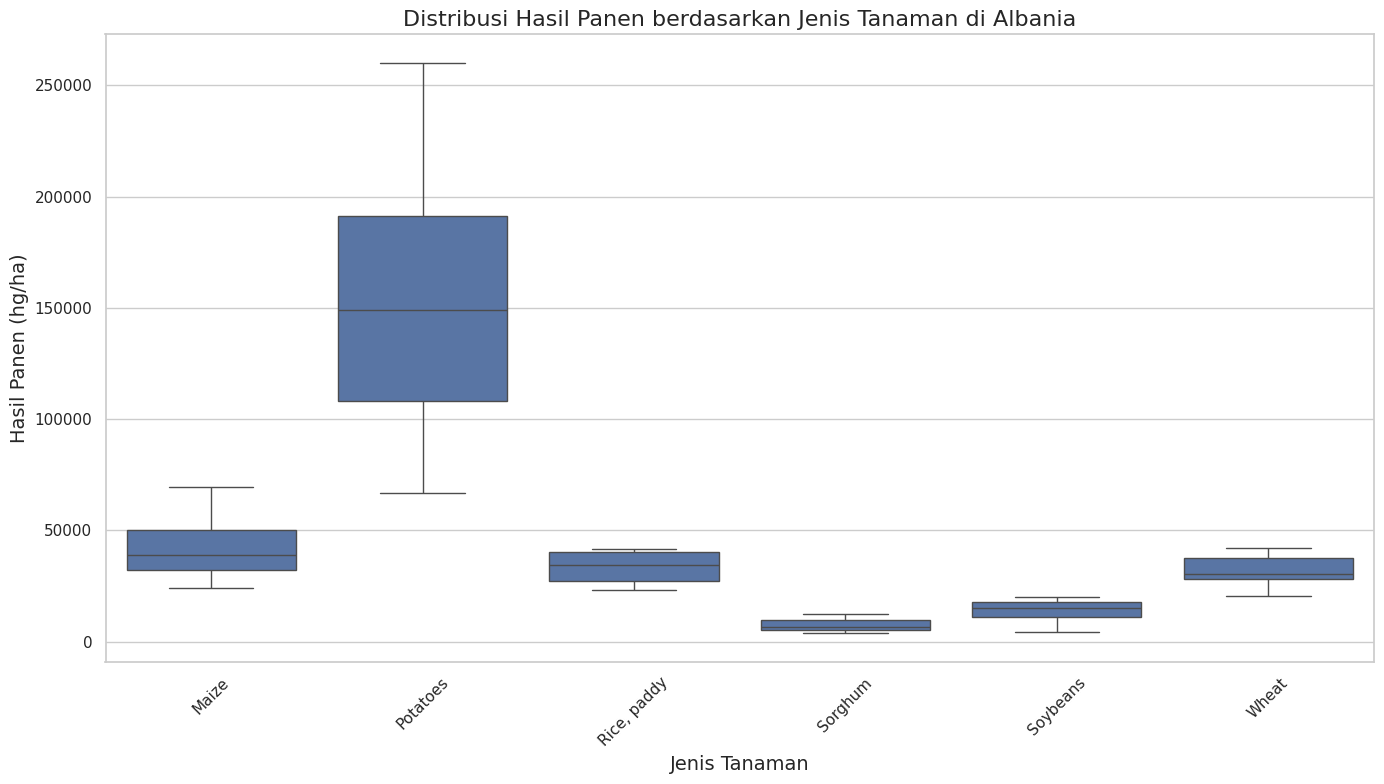

In [ ]:
# Distribusi hasil panen berdasarkan jenis tanaman di Albania
top_crops_albania = crop_counts_albania.head(min(8, len(crop_counts_albania))).index
if len(top_crops_albania) > 1:  # Pastikan ada lebih dari 1 jenis tanaman
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Item', y='hg/ha_yield', data=albania_df[albania_df['Item'].isin(top_crops_albania)])
    plt.title('Distribusi Hasil Panen berdasarkan Jenis Tanaman di Albania', fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel('Jenis Tanaman', fontsize=14)
    plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
    plt.tight_layout()
    plt.show()

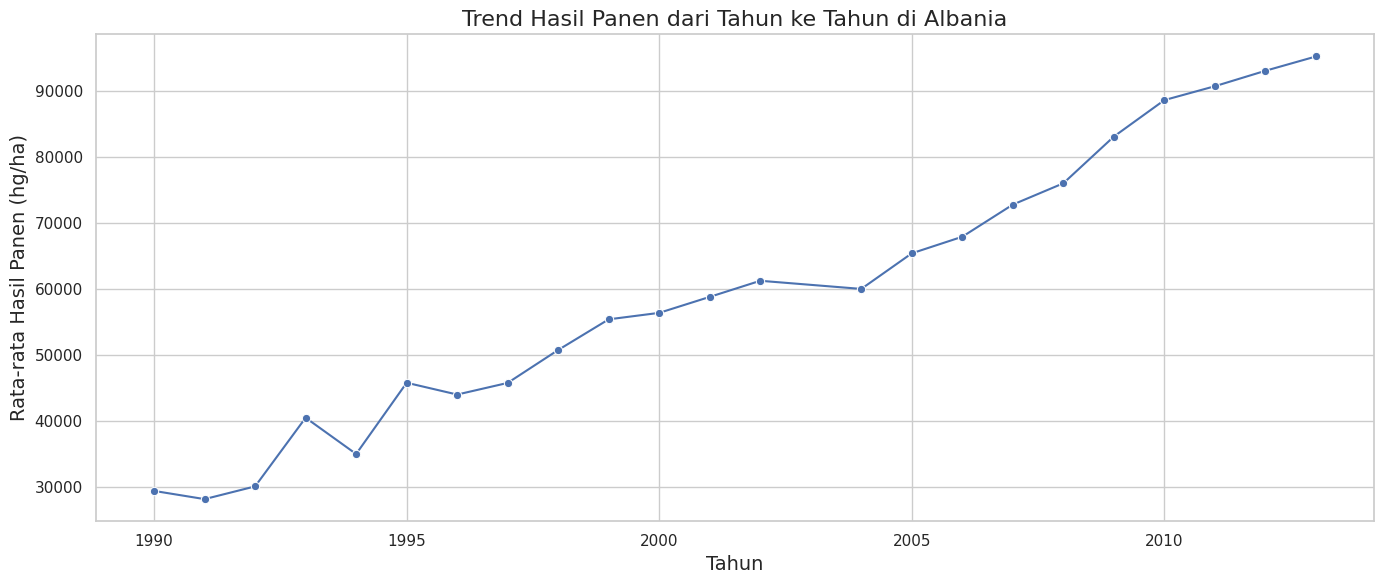

In [ ]:
# Trend hasil panen dari waktu ke waktu di Albania
yearly_yield_albania = albania_df.groupby('Year')['hg/ha_yield'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='hg/ha_yield', data=yearly_yield_albania, marker='o')
plt.title('Trend Hasil Panen dari Tahun ke Tahun di Albania', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Rata-rata Hasil Panen (hg/ha)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

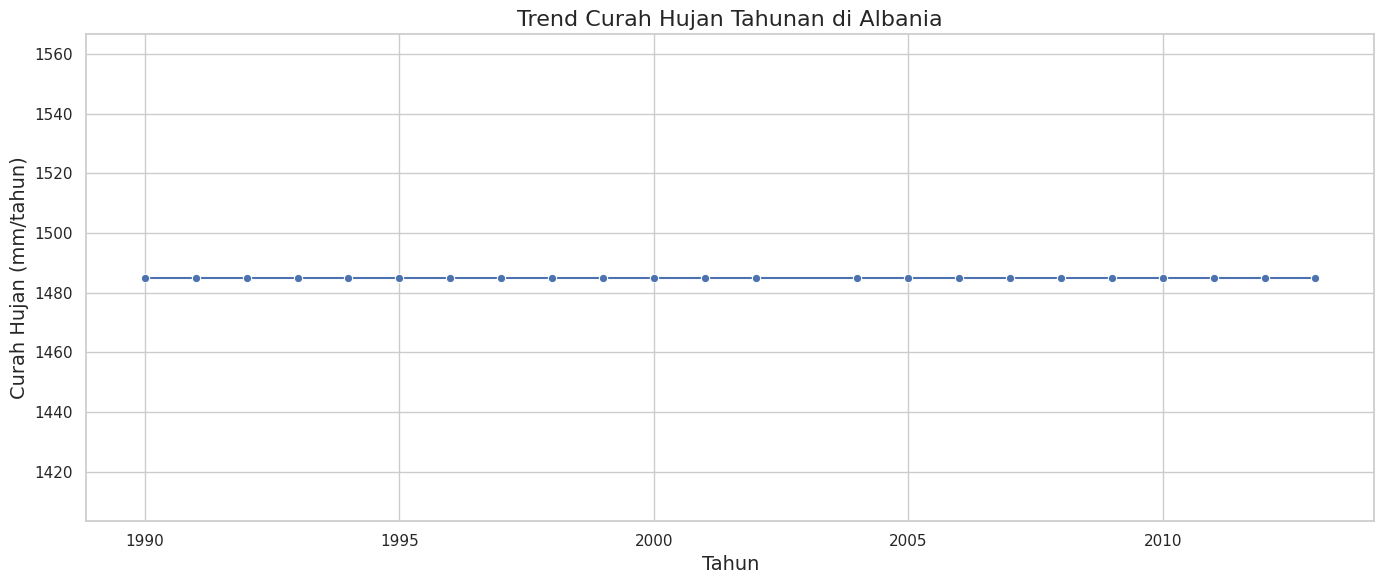

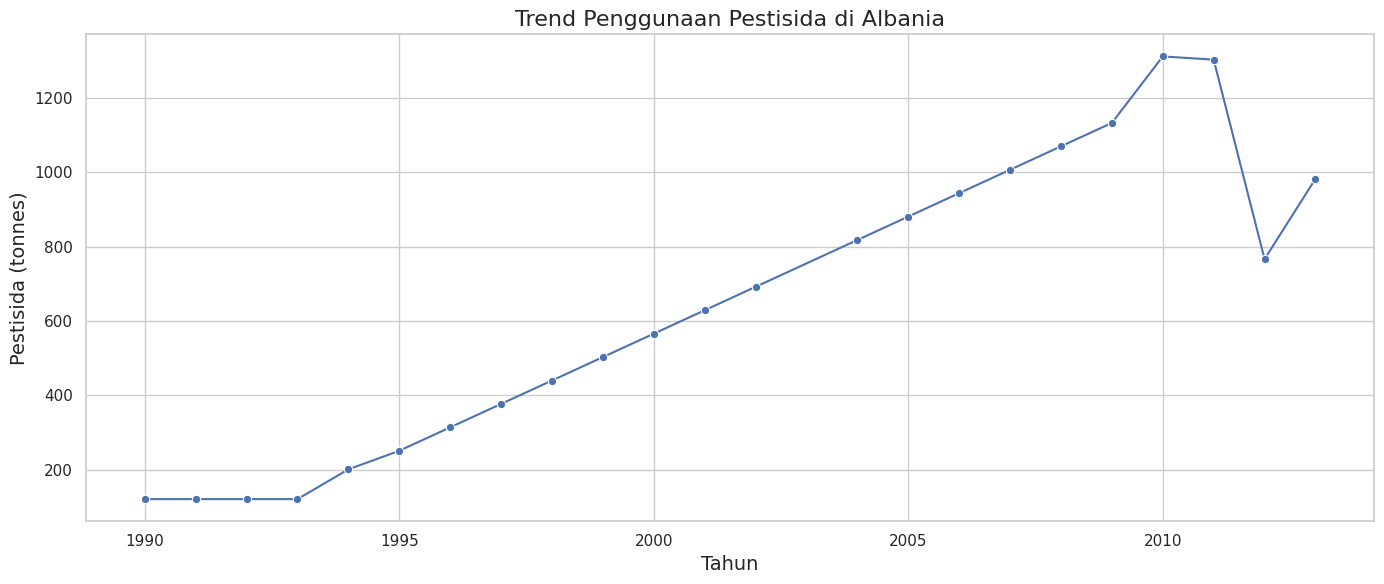

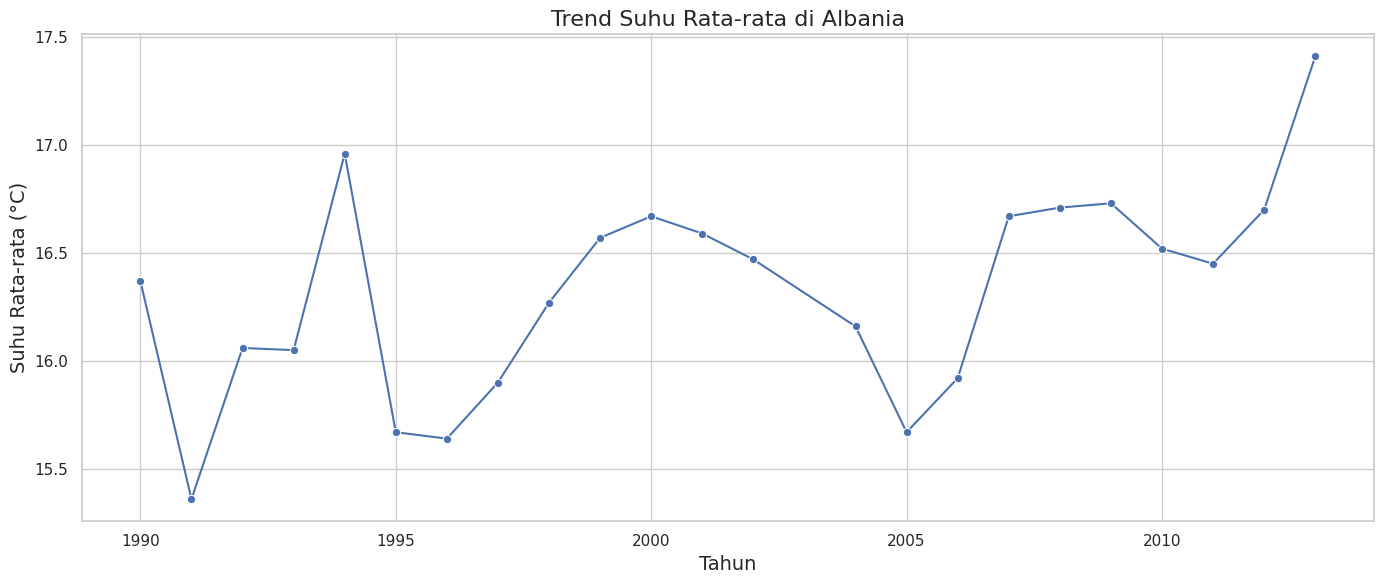

In [ ]:
# Visualisasi perubahan faktor lingkungan dari waktu ke waktu di Albania
env_factors_albania = albania_df.groupby('Year')[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].mean().reset_index()

# Plot untuk curah hujan
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='average_rain_fall_mm_per_year', data=env_factors_albania, marker='o')
plt.title('Trend Curah Hujan Tahunan di Albania', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Curah Hujan (mm/tahun)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot untuk pestisida
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='pesticides_tonnes', data=env_factors_albania, marker='o')
plt.title('Trend Penggunaan Pestisida di Albania', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Pestisida (tonnes)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot untuk suhu
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='avg_temp', data=env_factors_albania, marker='o')
plt.title('Trend Suhu Rata-rata di Albania', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Suhu Rata-rata (°C)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA Segmented (By Items)

In [ ]:
# Import library yang diperlukan (jika belum diimport)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset (pastikan path file sesuai)
data_path = "/content/drive/MyDrive/Colab Notebooks/Tugas2ML/yield_df.csv"
df = pd.read_csv(data_path)

# Ganti kolom Unnamed menjadi No jika ada
df = df.rename(columns=lambda x: 'No' if 'Unnamed' in x else x)

# Melihat jenis tanaman dengan data terbanyak
crop_counts = df['Item'].value_counts()
print("10 jenis tanaman dengan data terbanyak:")
print(crop_counts.head(10))

10 jenis tanaman dengan data terbanyak:
Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


In [ ]:
# Fungsi untuk melakukan EDA pada jenis tanaman tertentu
def crop_eda(crop_name):
    print(f"\n{'='*50}\nANALISIS EDA UNTUK TANAMAN {crop_name.upper()}\n{'='*50}")

    # Filter dataset untuk jenis tanaman tertentu
    crop_df = df[df['Item'] == crop_name].copy()

    # Melihat informasi dasar dataset
    print(f"Jumlah data untuk tanaman {crop_name}: {len(crop_df)}")

    # Statistik deskriptif untuk data tanaman
    print(f"\nStatistik deskriptif data tanaman {crop_name}:")
    print(crop_df.describe())

    # Melihat negara yang menanam tanaman ini
    country_counts = crop_df['Area'].value_counts()
    print(f"\n10 negara terbanyak yang menanam {crop_name}:")
    print(country_counts.head(10))

    # Visualisasi korelasi untuk data tanaman
    numeric_columns = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    correlation_crop = crop_df[numeric_columns].corr()

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_crop, dtype=bool))
    sns.heatmap(correlation_crop, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
    plt.title(f'Korelasi antar Variabel Numerik untuk Tanaman {crop_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

    return crop_df


ANALISIS EDA UNTUK TANAMAN POTATOES
Jumlah data untuk tanaman Potatoes: 4276

Statistik deskriptif data tanaman Potatoes:
                 No         Year    hg/ha_yield  \
count   4276.000000  4276.000000    4276.000000   
mean   14629.967961  2001.577877  199801.549579   
std     8367.816414     7.039190   93382.176418   
min        1.000000  1990.000000    8406.000000   
25%     7140.250000  1995.000000  140233.250000   
50%    15175.500000  2001.000000  182271.000000   
75%    21905.250000  2008.000000  253729.000000   
max    28236.000000  2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes     avg_temp  
count                    4276.000000        4276.000000  4276.000000  
mean                     1060.399205       32152.516104    19.007725  
std                       691.026858       53222.971160     7.061182  
min                        51.000000           0.040000     1.300000  
25%                       537.000000        1597.000000    13.

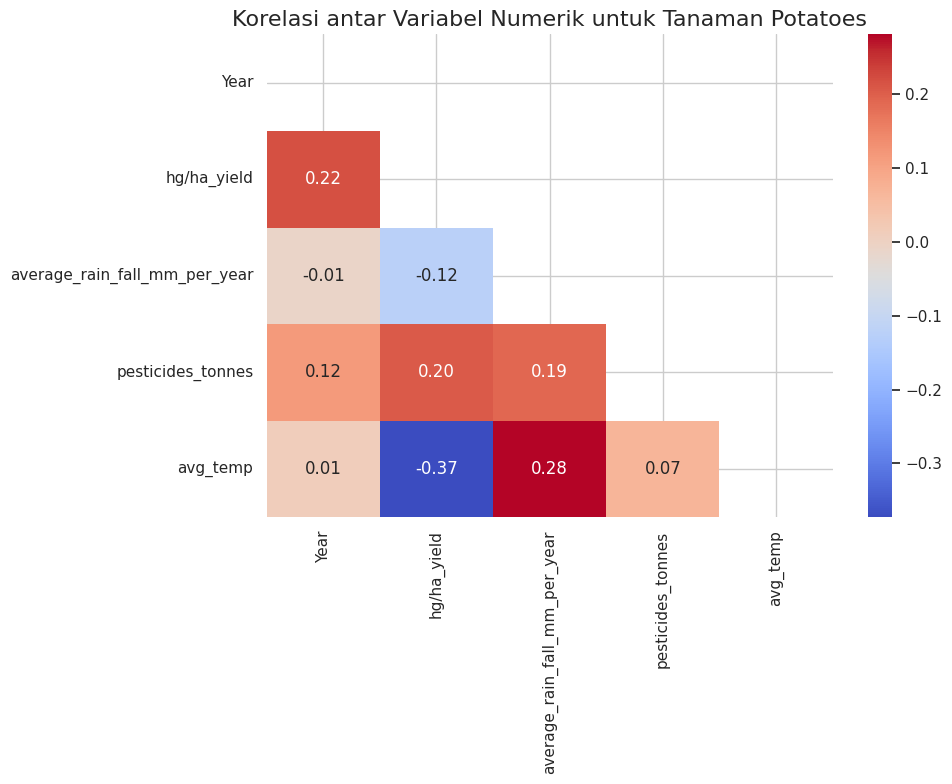

In [ ]:
# Analisis untuk tanaman Maize (Kentang)
maize_df = crop_eda('Potatoes')

Tanaman Kentang (Segmentasi Jenis Tanaman)

Korelasi Negatif antara Suhu dan Hasil Panen (-0.37): Untuk tanaman kentang, suhu yang lebih tinggi cenderung berhubungan dengan hasil panen yang lebih rendah, menunjukkan kentang mungkin lebih cocok di iklim yang lebih sejuk.
Korelasi Positif antara Suhu dan Curah Hujan (0.28): Daerah dengan suhu lebih tinggi cenderung memiliki curah hujan yang lebih tinggi dalam dataset ini.
Korelasi Positif antara Pestisida dan Hasil Panen (0.20): Penggunaan pestisida yang lebih tinggi berhubungan dengan hasil panen kentang yang lebih tinggi.
Korelasi Negatif antara Curah Hujan dan Hasil Panen (-0.12): Curah hujan yang berlebihan mungkin merugikan produksi kentang.
Pengaruh Tahun: Terdapat korelasi positif lemah (0.22) antara tahun dan hasil panen, menunjukkan adanya peningkatan produktivitas kentang seiring waktu, mungkin karena kemajuan teknologi pertanian.

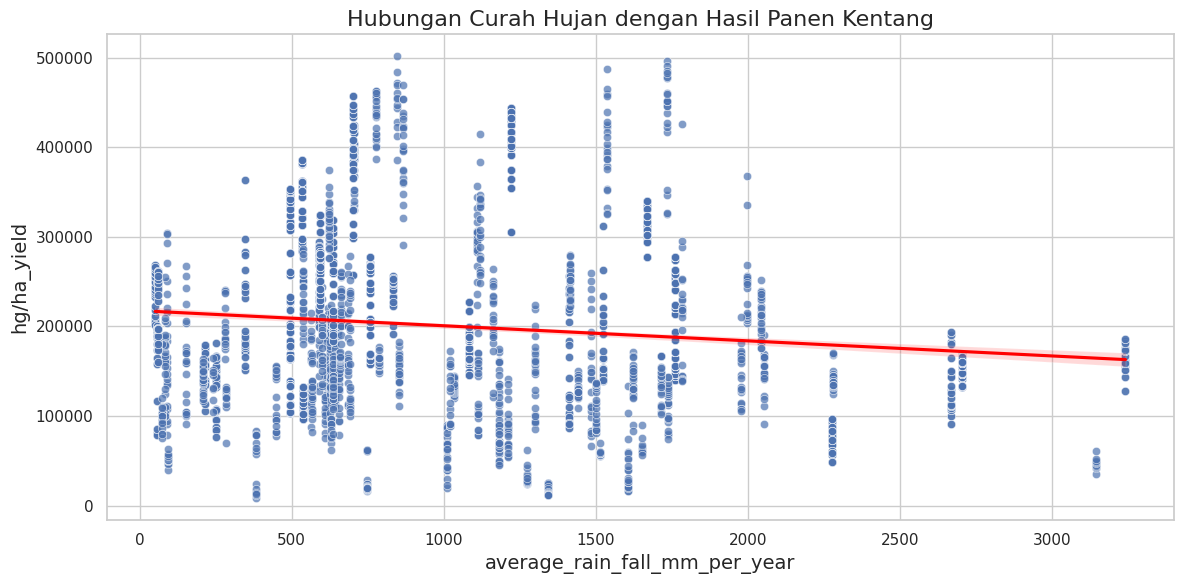

In [ ]:
# Scatter plot hubungan curah hujan dengan hasil panen Kentang
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=maize_df, alpha=0.7)
plt.title('Hubungan Curah Hujan dengan Hasil Panen Kentang', fontsize=16)
plt.xlabel('Curah Hujan Tahunan (mm)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
sns.regplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=maize_df, scatter=False, color='red')
plt.tight_layout()
plt.show()

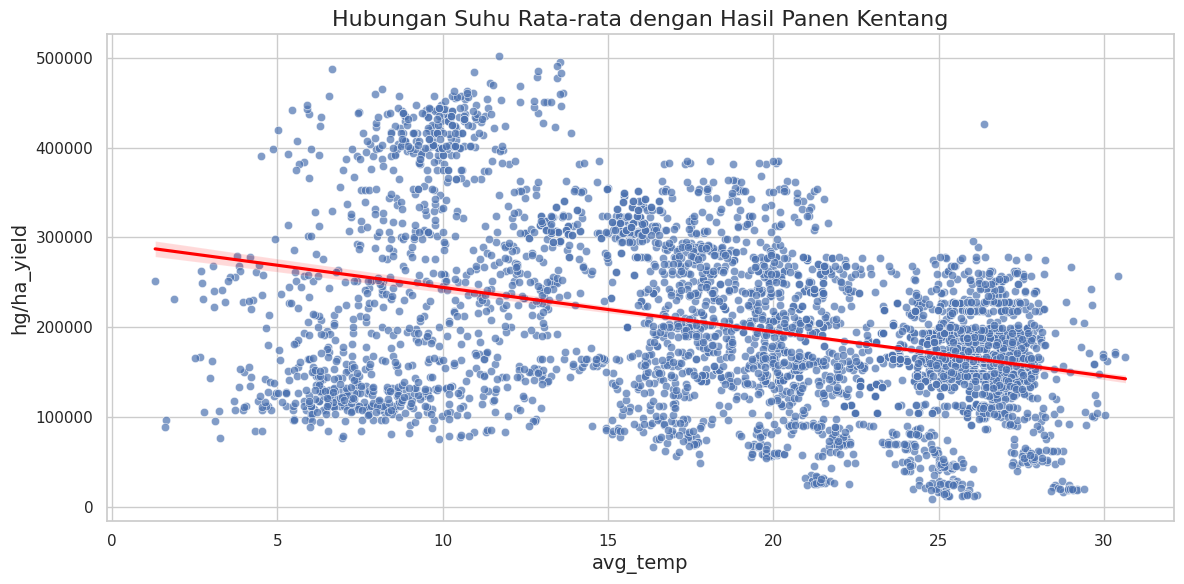

In [ ]:
# Scatter plot hubungan suhu dengan hasil panen Kentang
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=maize_df, alpha=0.7)
plt.title('Hubungan Suhu Rata-rata dengan Hasil Panen Kentang', fontsize=16)
plt.xlabel('Suhu Rata-rata (°C)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
sns.regplot(x='avg_temp', y='hg/ha_yield', data=maize_df, scatter=False, color='red')
plt.tight_layout()
plt.show()

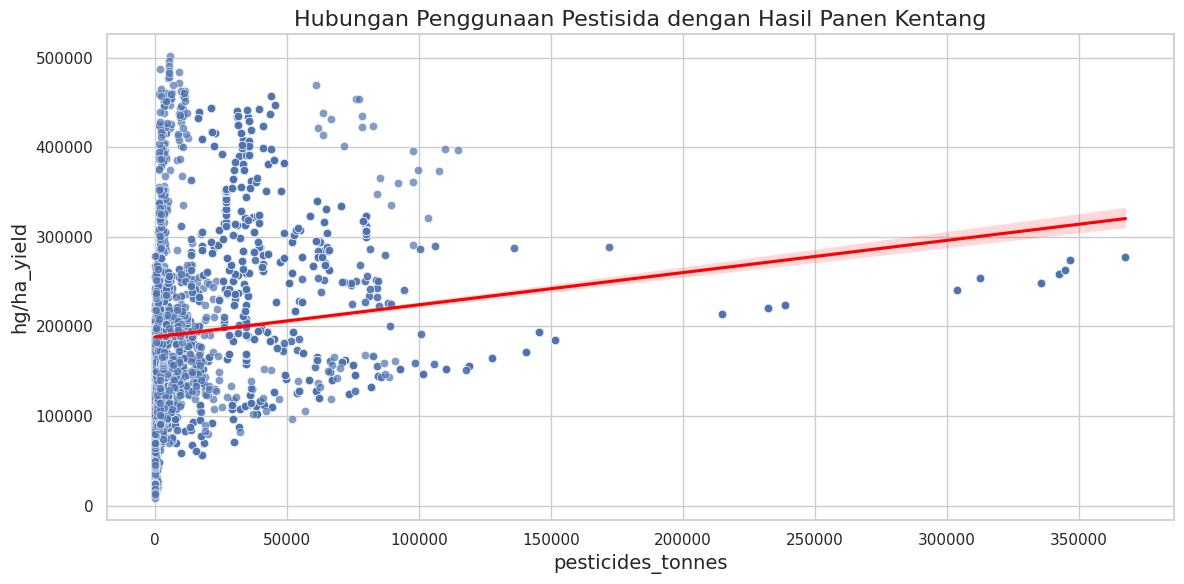

In [ ]:
# Scatter plot hubungan pestisida dengan hasil panen Kentang
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=maize_df, alpha=0.7)
plt.title('Hubungan Penggunaan Pestisida dengan Hasil Panen Kentang', fontsize=16)
plt.xlabel('Penggunaan Pestisida (tonnes)', fontsize=14)
plt.ylabel('Hasil Panen (hg/ha)', fontsize=14)
sns.regplot(x='pesticides_tonnes', y='hg/ha_yield', data=maize_df, scatter=False, color='red')
plt.tight_layout()
plt.show()

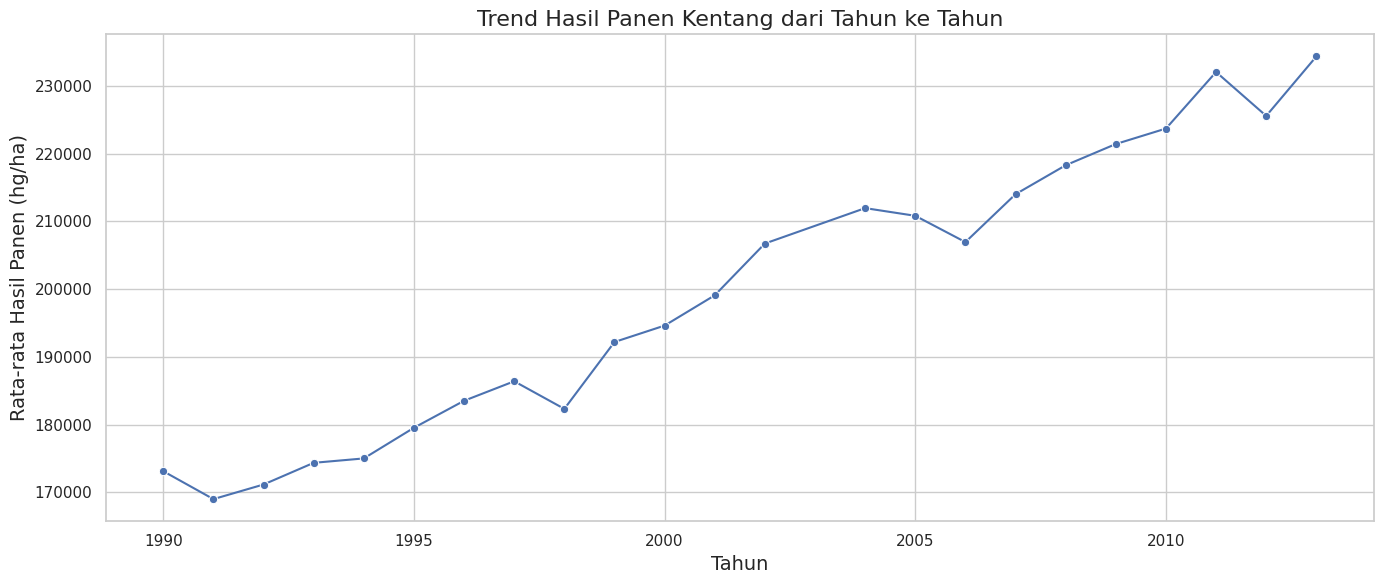

In [ ]:
# Trend hasil panen Kentang dari waktu ke waktu
yearly_yield_maize = maize_df.groupby('Year')['hg/ha_yield'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='hg/ha_yield', data=yearly_yield_maize, marker='o')
plt.title('Trend Hasil Panen Kentang dari Tahun ke Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Rata-rata Hasil Panen (hg/ha)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

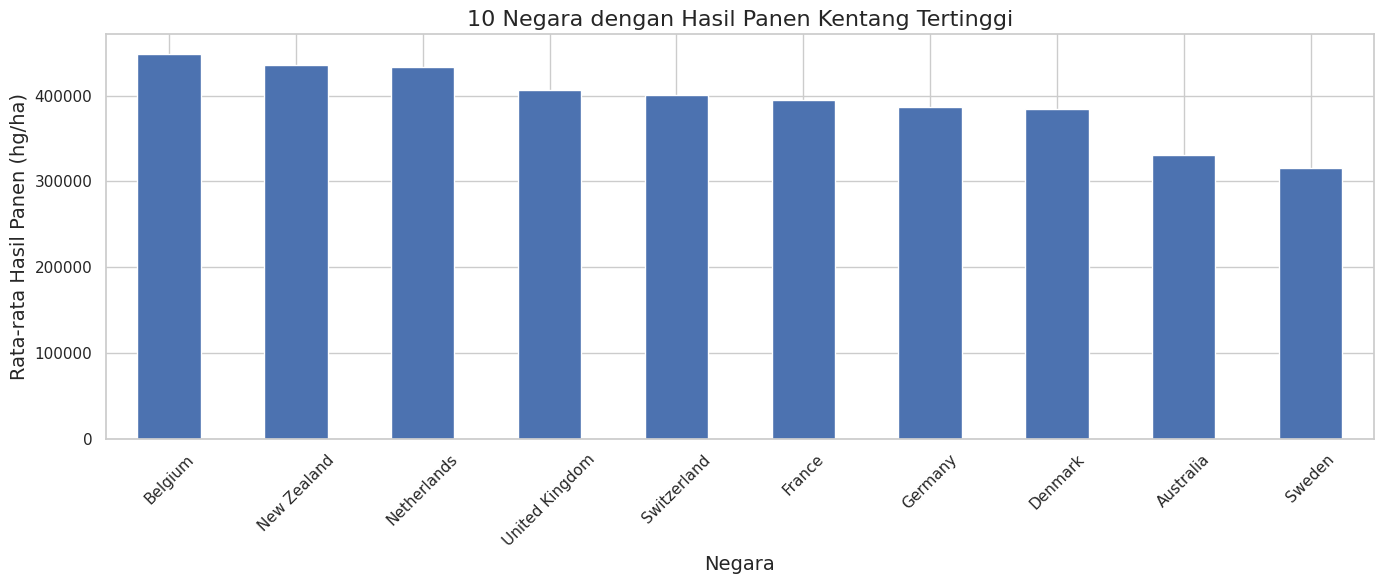

In [ ]:
# 10 negara dengan hasil panen Kentang tertinggi
top_countries_maize = maize_df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
top_countries_maize.plot(kind='bar')
plt.title('10 Negara dengan Hasil Panen Kentang Tertinggi', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Rata-rata Hasil Panen (hg/ha)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Wawasan Mendalam: Segmentasi Data vs Dataset Keseluruhan
Segmentasi data terbukti jauh lebih efektif dalam menganalisis dataset hasil panen ini karena beberapa alasan kunci:
1. Penguatan Sinyal Korelasi
Pada dataset keseluruhan, korelasi antara variabel independen (curah hujan, suhu, pestisida) dan variabel target (hasil panen) sangat lemah:

Curah hujan dengan hasil panen: ~0.00
Suhu dengan hasil panen: ~-0.11
Pestisida dengan hasil panen: ~0.06

Namun, setelah segmentasi:

Untuk Albania: korelasi hasil panen dengan pestisida mencapai 0.33
Untuk tanaman kentang: korelasi hasil panen dengan suhu mencapai -0.37

Ini menunjukkan bahwa "sinyal" hubungan antara variabel tersembunyi dalam "noise" dataset gabungan, dan menjadi lebih jelas ketika data disegmentasi.
2. Mengungkap Pola Spesifik Konteks
Setiap tanaman dan region memiliki karakteristik unik yang hilang ketika data digabungkan:

Karakteristik Geografis: Albania menunjukkan pola khusus dengan peningkatan signifikan penggunaan pestisida (korelasi 0.95 dengan tahun), yang tidak terlihat pada tingkat global.
Kebutuhan Spesifik Tanaman: Kentang menunjukkan korelasi negatif dengan suhu (-0.37), mengindikasikan preferensi iklim sejuk. Pola ini "tenggelam" dalam dataset keseluruhan karena tanaman lain mungkin lebih menyukai suhu tinggi.

3. Mengatasi Heterogenitas dalam Dataset
Dataset hasil panen global sangat heterogen karena:

Praktik pertanian berbeda antar negara
Jenis tanah bervariasi secara geografis
Respons tanaman terhadap faktor lingkungan sangat beragam
Teknologi pertanian tidak merata secara global

Segmentasi memungkinkan kita menganalisis kelompok data yang lebih homogen, sehingga hubungan antar variabel lebih bermakna.
4. Implikasi untuk Pemodelan
Dataset keseluruhan menghasilkan model dengan performa rendah karena:

Korelasi lemah antara prediktor dan target
Banyak noise dalam data
Hubungan non-linear yang kompleks dan berbeda-beda

Dengan segmentasi, kita bisa membangun model yang:

Lebih fokus pada pola spesifik
Mampu mengidentifikasi hubungan yang lebih kuat
Memberikan prediksi yang lebih akurat untuk kasus tertentu

Kesimpulan
Analisis dataset hasil panen global memerlukan pendekatan segmentasi untuk mengungkap wawasan berharga yang tersembunyi dalam kompleksitas data keseluruhan. Pendekatan "satu model untuk semua" cenderung menghasilkan generalisasi yang lemah, sementara model yang dibangun berdasarkan segmentasi geografis atau jenis tanaman dapat menangkap nuansa hubungan yang lebih bermakna antara faktor lingkungan dan hasil panen.

# Preprocessing

### Check missing values

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cek missing values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

# Jika ada missing values, kita bisa mengisi dengan median
# df.fillna(df.median(numeric_only=True), inplace=True)

# Atau menghapus baris dengan missing values jika jumlahnya sedikit
# df.dropna(inplace=True)

print("Dataset setelah menangani missing values:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah missing values per kolom:
No                               0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
Dataset setelah menangani missing values:
Jumlah baris: 28242
Jumlah kolom: 8


### Transformasi Target Variable

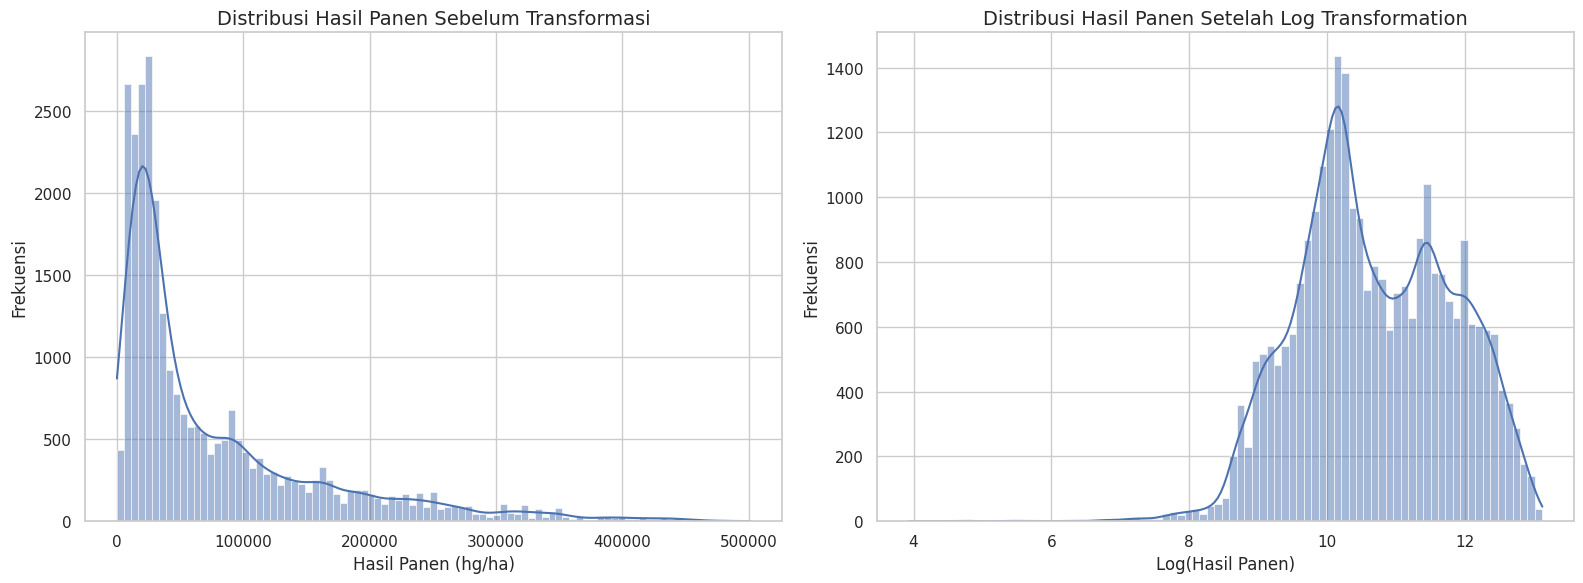

In [ ]:
# Transformasi log untuk target variable karena distribusinya skewed
df['log_yield'] = np.log1p(df['hg/ha_yield'])

# Visualisasi distribusi target sebelum dan sesudah transformasi
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['hg/ha_yield'], kde=True)
plt.title('Distribusi Hasil Panen Sebelum Transformasi', fontsize=14)
plt.xlabel('Hasil Panen (hg/ha)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['log_yield'], kde=True)
plt.title('Distribusi Hasil Panen Setelah Log Transformation', fontsize=14)
plt.xlabel('Log(Hasil Panen)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

### Feature Selection dan Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang digunakan berdasarkan EDA
features = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
categorical_features = ['Area', 'Item']
target = 'log_yield'  # gunakan target yang sudah ditransformasi

# Standarisasi fitur numerik
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Tampilkan perbandingan sebelum dan sesudah normalisasi
print("Sebelum normalisasi:")
print(df[features].describe())

print("\nSetelah normalisasi:")
print(df_scaled[features].describe())

Sebelum normalisasi:
       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp
count                    28242.00000       28242.000000  28242.000000
mean                      1149.05598       37076.909344     20.542627
std                        709.81215       59958.784665      6.312051
min                         51.00000           0.040000      1.300000
25%                        593.00000        1702.000000     16.702500
50%                       1083.00000       17529.440000     21.510000
75%                       1668.00000       48687.880000     26.000000
max                       3240.00000      367778.000000     30.650000

Setelah normalisasi:
       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp
count                   2.824200e+04       2.824200e+04  2.824200e+04
mean                    1.449163e-16       1.408908e-16  4.750034e-16
std                     1.000018e+00       1.000018e+00  1.000018e+00
min                    -1.546994e+00      -6.18

# Model Build

In [ ]:
# Import library untuk pemodelan dan evaluasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Setting untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

### Strategi 1: Model dengan Dataset Penuh

In [ ]:
# Definisikan fitur dan target
features = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
categorical_features = ['Area', 'Item']
target = 'log_yield'  # target yang sudah ditransformasi log

# Persiapan data untuk model keseluruhan dataset
X_full = df[features + categorical_features]
y_full = df[target]

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Preprocessing dengan pipeline
preprocessor_full = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model Linear Regression untuk dataset penuh
linear_model_full = Pipeline([
    ('preprocessor', preprocessor_full),
    ('regressor', LinearRegression())
])

# Fit model linear
print("Melatih model Linear Regression dengan dataset penuh...")
linear_model_full.fit(X_train_full, y_train_full)
print("Pelatihan selesai!")

# Model Polynomial Regression (derajat 2) untuk dataset penuh
poly_model_full = Pipeline([
    ('preprocessor', preprocessor_full),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Fit model polynomial
print("Melatih model Polynomial Regression dengan dataset penuh...")
poly_model_full.fit(X_train_full, y_train_full)
print("Pelatihan selesai!")

Melatih model Linear Regression dengan dataset penuh...
Pelatihan selesai!
Melatih model Polynomial Regression dengan dataset penuh...
Pelatihan selesai!


### Evaluasi Model - Dataset Penuh

Evaluasi Model Linear Regression (Dataset Penuh):
RMSE: 0.4578
MAE: 0.3477
R²: 0.8290

Evaluasi Model Polynomial Regression (Dataset Penuh):
RMSE: 0.2148
MAE: 0.1400
R²: 0.9623


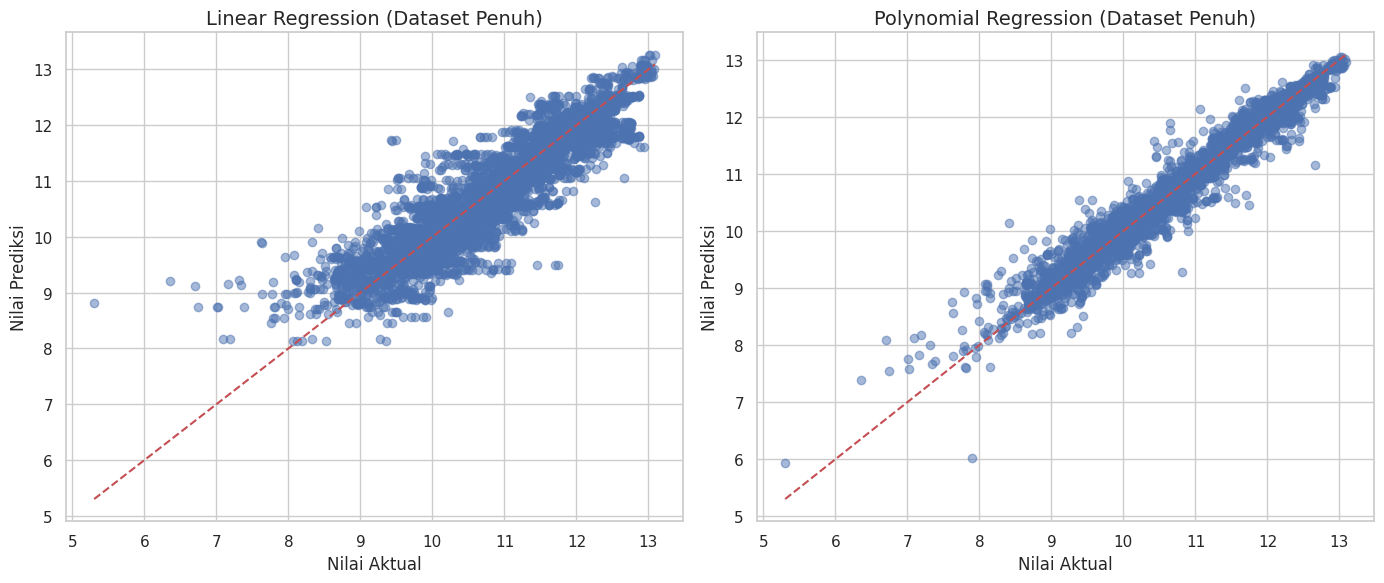

In [ ]:
# Prediksi dengan model dataset penuh
y_pred_linear_full = linear_model_full.predict(X_test_full)
y_pred_poly_full = poly_model_full.predict(X_test_full)

# Evaluasi model linear dataset penuh
linear_mse_full = mean_squared_error(y_test_full, y_pred_linear_full)
linear_rmse_full = np.sqrt(linear_mse_full)
linear_mae_full = mean_absolute_error(y_test_full, y_pred_linear_full)
linear_r2_full = r2_score(y_test_full, y_pred_linear_full)

print("Evaluasi Model Linear Regression (Dataset Penuh):")
print(f"RMSE: {linear_rmse_full:.4f}")
print(f"MAE: {linear_mae_full:.4f}")
print(f"R²: {linear_r2_full:.4f}")

# Evaluasi model polynomial dataset penuh
poly_mse_full = mean_squared_error(y_test_full, y_pred_poly_full)
poly_rmse_full = np.sqrt(poly_mse_full)
poly_mae_full = mean_absolute_error(y_test_full, y_pred_poly_full)
poly_r2_full = r2_score(y_test_full, y_pred_poly_full)

print("\nEvaluasi Model Polynomial Regression (Dataset Penuh):")
print(f"RMSE: {poly_rmse_full:.4f}")
print(f"MAE: {poly_mae_full:.4f}")
print(f"R²: {poly_r2_full:.4f}")

# Visualisasi perbandingan nilai aktual vs prediksi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_full, y_pred_linear_full, alpha=0.5)
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Linear Regression (Dataset Penuh)', fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(y_test_full, y_pred_poly_full, alpha=0.5)
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Polynomial Regression (Dataset Penuh)', fontsize=14)

plt.tight_layout()
plt.show()

### Strategi 2: Model per Negara (Contoh: Albania)

In [ ]:
# Filter data untuk Albania
albania_df = df[df['Area'] == 'Albania'].copy()

# Periksa fitur dengan standar deviasi nol
zero_std_features = []
for feature in features:
    if albania_df[feature].std() == 0:
        zero_std_features.append(feature)

if zero_std_features:
    print(f"Fitur dengan standar deviasi nol untuk Albania: {zero_std_features}")
    # Hapus fitur tersebut untuk model Albania
    features_albania = [f for f in features if f not in zero_std_features]
    print(f"Menggunakan fitur: {features_albania} untuk model Albania")
else:
    features_albania = features.copy()

# Persiapan data untuk Albania
X_albania = albania_df[features_albania]
y_albania = albania_df[target]

# Split data
X_train_albania, X_test_albania, y_train_albania, y_test_albania = train_test_split(
    X_albania, y_albania, test_size=0.2, random_state=42
)

# Standarisasi fitur
scaler_albania = StandardScaler()
X_train_albania_scaled = scaler_albania.fit_transform(X_train_albania)
X_test_albania_scaled = scaler_albania.transform(X_test_albania)

# Model Linear Regression untuk Albania
print("Melatih model Linear Regression untuk Albania...")
linear_model_albania = LinearRegression()
linear_model_albania.fit(X_train_albania_scaled, y_train_albania)
print("Pelatihan selesai!")

# Model Polynomial Regression untuk Albania
print("Melatih model Polynomial Regression untuk Albania...")
poly_features_albania = PolynomialFeatures(degree=2, include_bias=False)
X_train_albania_poly = poly_features_albania.fit_transform(X_train_albania_scaled)
X_test_albania_poly = poly_features_albania.transform(X_test_albania_scaled)

poly_model_albania = LinearRegression()
poly_model_albania.fit(X_train_albania_poly, y_train_albania)
print("Pelatihan selesai!")

Fitur dengan standar deviasi nol untuk Albania: ['average_rain_fall_mm_per_year']
Menggunakan fitur: ['pesticides_tonnes', 'avg_temp'] untuk model Albania
Melatih model Linear Regression untuk Albania...
Pelatihan selesai!
Melatih model Polynomial Regression untuk Albania...
Pelatihan selesai!


### Evaluasi Model - Albania

Evaluasi Model Linear Regression (Albania):
RMSE: 1.0039
MAE: 0.7798
R²: 0.1624

Evaluasi Model Polynomial Regression (Albania):
RMSE: 1.0943
MAE: 0.8412
R²: 0.0049


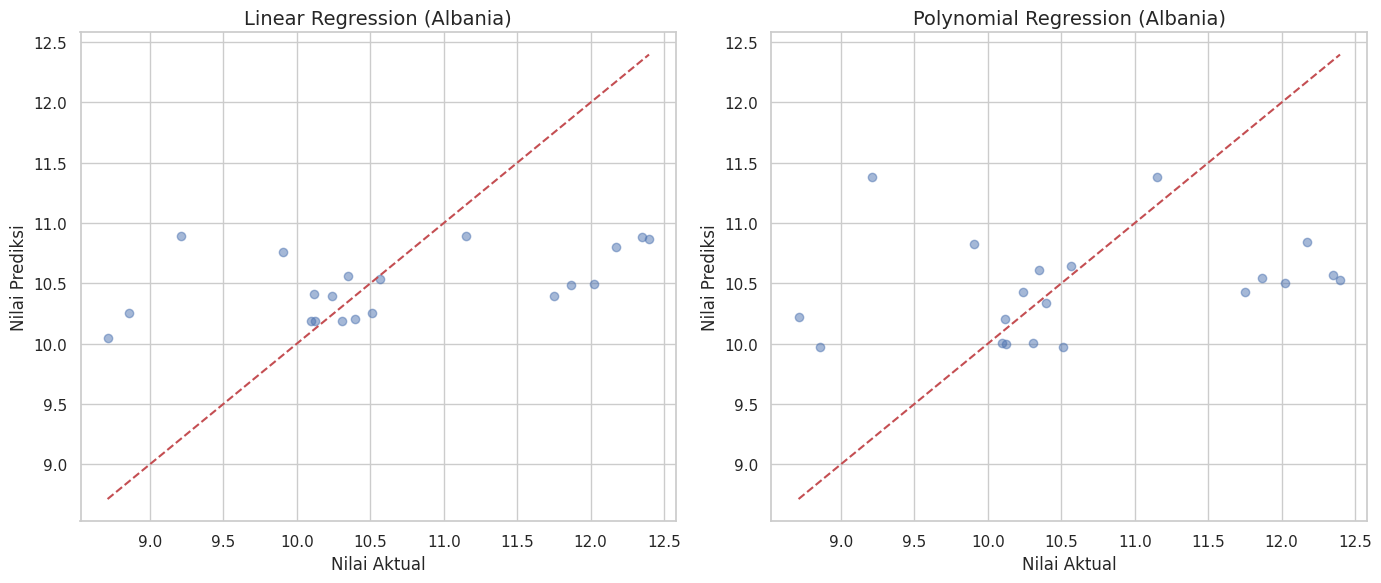

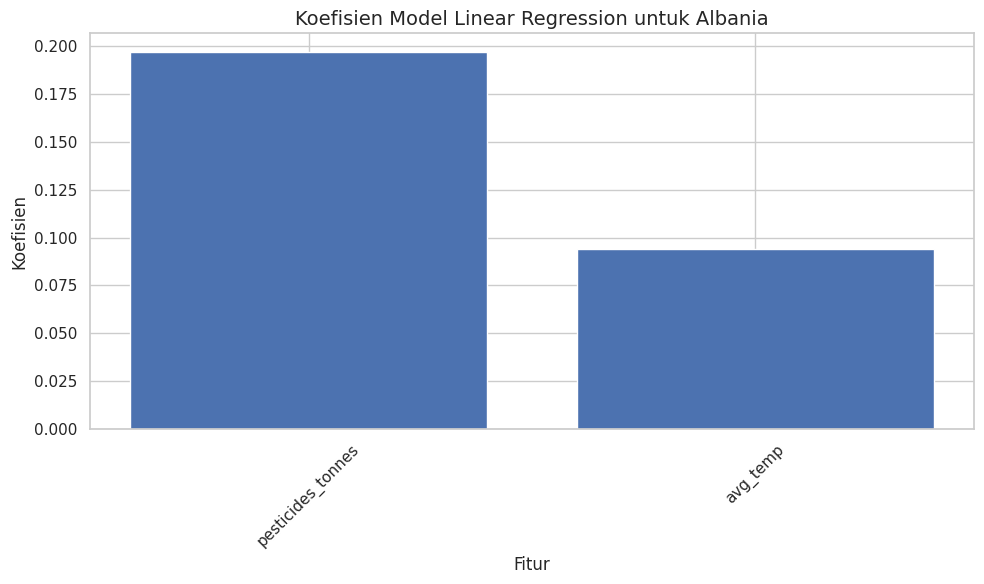

In [ ]:
# Prediksi dengan model Albania
y_pred_linear_albania = linear_model_albania.predict(X_test_albania_scaled)
y_pred_poly_albania = poly_model_albania.predict(X_test_albania_poly)

# Evaluasi model linear Albania
linear_mse_albania = mean_squared_error(y_test_albania, y_pred_linear_albania)
linear_rmse_albania = np.sqrt(linear_mse_albania)
linear_mae_albania = mean_absolute_error(y_test_albania, y_pred_linear_albania)
linear_r2_albania = r2_score(y_test_albania, y_pred_linear_albania)

print("Evaluasi Model Linear Regression (Albania):")
print(f"RMSE: {linear_rmse_albania:.4f}")
print(f"MAE: {linear_mae_albania:.4f}")
print(f"R²: {linear_r2_albania:.4f}")

# Evaluasi model polynomial Albania
poly_mse_albania = mean_squared_error(y_test_albania, y_pred_poly_albania)
poly_rmse_albania = np.sqrt(poly_mse_albania)
poly_mae_albania = mean_absolute_error(y_test_albania, y_pred_poly_albania)
poly_r2_albania = r2_score(y_test_albania, y_pred_poly_albania)

print("\nEvaluasi Model Polynomial Regression (Albania):")
print(f"RMSE: {poly_rmse_albania:.4f}")
print(f"MAE: {poly_mae_albania:.4f}")
print(f"R²: {poly_r2_albania:.4f}")

# Visualisasi perbandingan nilai aktual vs prediksi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_albania, y_pred_linear_albania, alpha=0.5)
plt.plot([y_test_albania.min(), y_test_albania.max()], [y_test_albania.min(), y_test_albania.max()], 'r--')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Linear Regression (Albania)', fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(y_test_albania, y_pred_poly_albania, alpha=0.5)
plt.plot([y_test_albania.min(), y_test_albania.max()], [y_test_albania.min(), y_test_albania.max()], 'r--')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Polynomial Regression (Albania)', fontsize=14)

plt.tight_layout()
plt.show()

# Visualisasi koefisien model linear untuk Albania
if len(features_albania) > 0:  # Pastikan ada fitur untuk divisualisasikan
    coefficients = linear_model_albania.coef_
    plt.figure(figsize=(10, 6))
    plt.bar(features_albania, coefficients)
    plt.title('Koefisien Model Linear Regression untuk Albania', fontsize=14)
    plt.xlabel('Fitur', fontsize=12)
    plt.ylabel('Koefisien', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Strategi 3: Model per Jenis Tanaman (Potatoes)

In [ ]:
# Filter data untuk Albania
albania_df = df[df['Area'] == 'Albania'].copy()

# Periksa fitur dengan standar deviasi nol
zero_std_features = []
for feature in features:
    if albania_df[feature].std() == 0:
        zero_std_features.append(feature)

if zero_std_features:
    print(f"Fitur dengan standar deviasi nol untuk Albania: {zero_std_features}")
    # Hapus fitur tersebut untuk model Albania
    features_albania = [f for f in features if f not in zero_std_features]
    print(f"Menggunakan fitur: {features_albania} untuk model Albania")
else:
    features_albania = features.copy()

# Persiapan data untuk Albania
X_albania = albania_df[features_albania]
y_albania = albania_df[target]

# Split data
X_train_albania, X_test_albania, y_train_albania, y_test_albania = train_test_split(
    X_albania, y_albania, test_size=0.2, random_state=42
)

# Standarisasi fitur
scaler_albania = StandardScaler()
X_train_albania_scaled = scaler_albania.fit_transform(X_train_albania)
X_test_albania_scaled = scaler_albania.transform(X_test_albania)

# Model Linear Regression untuk Albania
print("Melatih model Linear Regression untuk Albania...")
linear_model_albania = LinearRegression()
linear_model_albania.fit(X_train_albania_scaled, y_train_albania)
print("Pelatihan selesai!")

# Model Polynomial Regression untuk Albania
print("Melatih model Polynomial Regression untuk Albania...")
poly_features_albania = PolynomialFeatures(degree=2, include_bias=False)
X_train_albania_poly = poly_features_albania.fit_transform(X_train_albania_scaled)
X_test_albania_poly = poly_features_albania.transform(X_test_albania_scaled)

poly_model_albania = LinearRegression()
poly_model_albania.fit(X_train_albania_poly, y_train_albania)
print("Pelatihan selesai!")

Fitur dengan standar deviasi nol untuk Albania: ['average_rain_fall_mm_per_year']
Menggunakan fitur: ['pesticides_tonnes', 'avg_temp'] untuk model Albania
Melatih model Linear Regression untuk Albania...
Pelatihan selesai!
Melatih model Polynomial Regression untuk Albania...
Pelatihan selesai!


### Evaluasi Model - Potatoes

In [ ]:
# Filter data untuk Potatoes (Kentang)
potatoes_df = df[df['Item'] == 'Potatoes'].copy()

# Persiapan data untuk kentang
X_potatoes = potatoes_df[features + ['Area']]
y_potatoes = potatoes_df[target]

# Split data
X_train_potatoes, X_test_potatoes, y_train_potatoes, y_test_potatoes = train_test_split(
    X_potatoes, y_potatoes, test_size=0.2, random_state=42
)

# Preprocessing dengan pipeline
preprocessor_potatoes = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Area'])
    ])

# Model Linear Regression untuk Potatoes
linear_model_potatoes = Pipeline([
    ('preprocessor', preprocessor_potatoes),
    ('regressor', LinearRegression())
])

# Fit model linear
print("Melatih model Linear Regression untuk tanaman kentang...")
linear_model_potatoes.fit(X_train_potatoes, y_train_potatoes)
print("Pelatihan selesai!")

# Model Polynomial Regression untuk Potatoes
poly_model_potatoes = Pipeline([
    ('preprocessor', preprocessor_potatoes),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Fit model polynomial
print("Melatih model Polynomial Regression untuk tanaman kentang...")
poly_model_potatoes.fit(X_train_potatoes, y_train_potatoes)
print("Pelatihan selesai!")

Melatih model Linear Regression untuk tanaman kentang...
Pelatihan selesai!
Melatih model Polynomial Regression untuk tanaman kentang...
Pelatihan selesai!


Evaluasi Model Linear Regression (Potatoes):
RMSE: 0.2021
MAE: 0.1380
R²: 0.8761

Evaluasi Model Polynomial Regression (Potatoes):
RMSE: 0.1774
MAE: 0.1156
R²: 0.9046


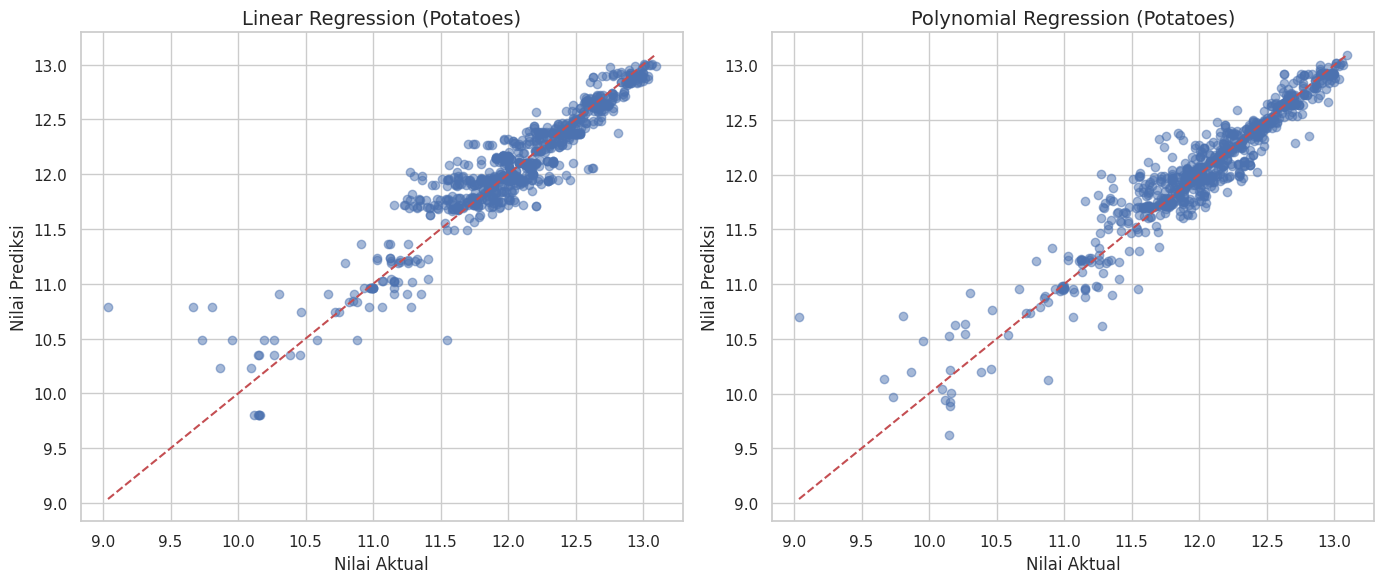

In [ ]:
# Prediksi dengan model Potatoes
y_pred_linear_potatoes = linear_model_potatoes.predict(X_test_potatoes)
y_pred_poly_potatoes = poly_model_potatoes.predict(X_test_potatoes)

# Evaluasi model linear Potatoes
linear_mse_potatoes = mean_squared_error(y_test_potatoes, y_pred_linear_potatoes)
linear_rmse_potatoes = np.sqrt(linear_mse_potatoes)
linear_mae_potatoes = mean_absolute_error(y_test_potatoes, y_pred_linear_potatoes)
linear_r2_potatoes = r2_score(y_test_potatoes, y_pred_linear_potatoes)

print("Evaluasi Model Linear Regression (Potatoes):")
print(f"RMSE: {linear_rmse_potatoes:.4f}")
print(f"MAE: {linear_mae_potatoes:.4f}")
print(f"R²: {linear_r2_potatoes:.4f}")

# Evaluasi model polynomial Potatoes
poly_mse_potatoes = mean_squared_error(y_test_potatoes, y_pred_poly_potatoes)
poly_rmse_potatoes = np.sqrt(poly_mse_potatoes)
poly_mae_potatoes = mean_absolute_error(y_test_potatoes, y_pred_poly_potatoes)
poly_r2_potatoes = r2_score(y_test_potatoes, y_pred_poly_potatoes)

print("\nEvaluasi Model Polynomial Regression (Potatoes):")
print(f"RMSE: {poly_rmse_potatoes:.4f}")
print(f"MAE: {poly_mae_potatoes:.4f}")
print(f"R²: {poly_r2_potatoes:.4f}")

# Visualisasi perbandingan nilai aktual vs prediksi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_potatoes, y_pred_linear_potatoes, alpha=0.5)
plt.plot([y_test_potatoes.min(), y_test_potatoes.max()], [y_test_potatoes.min(), y_test_potatoes.max()], 'r--')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Linear Regression (Potatoes)', fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(y_test_potatoes, y_pred_poly_potatoes, alpha=0.5)
plt.plot([y_test_potatoes.min(), y_test_potatoes.max()], [y_test_potatoes.min(), y_test_potatoes.max()], 'r--')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Polynomial Regression (Potatoes)', fontsize=14)

plt.tight_layout()
plt.show()

# Comparison

Perbandingan Performa Model:
                       Model      RMSE       MAE        R²
0      Linear (Full Dataset)  0.457796  0.347728  0.828951
1  Polynomial (Full Dataset)  0.214850  0.140020  0.962325
2           Linear (Albania)  1.003919  0.779840  0.162431
3       Polynomial (Albania)  1.094271  0.841224  0.004884
4          Linear (Potatoes)  0.202081  0.137960  0.876141
5      Polynomial (Potatoes)  0.177383  0.115596  0.904567


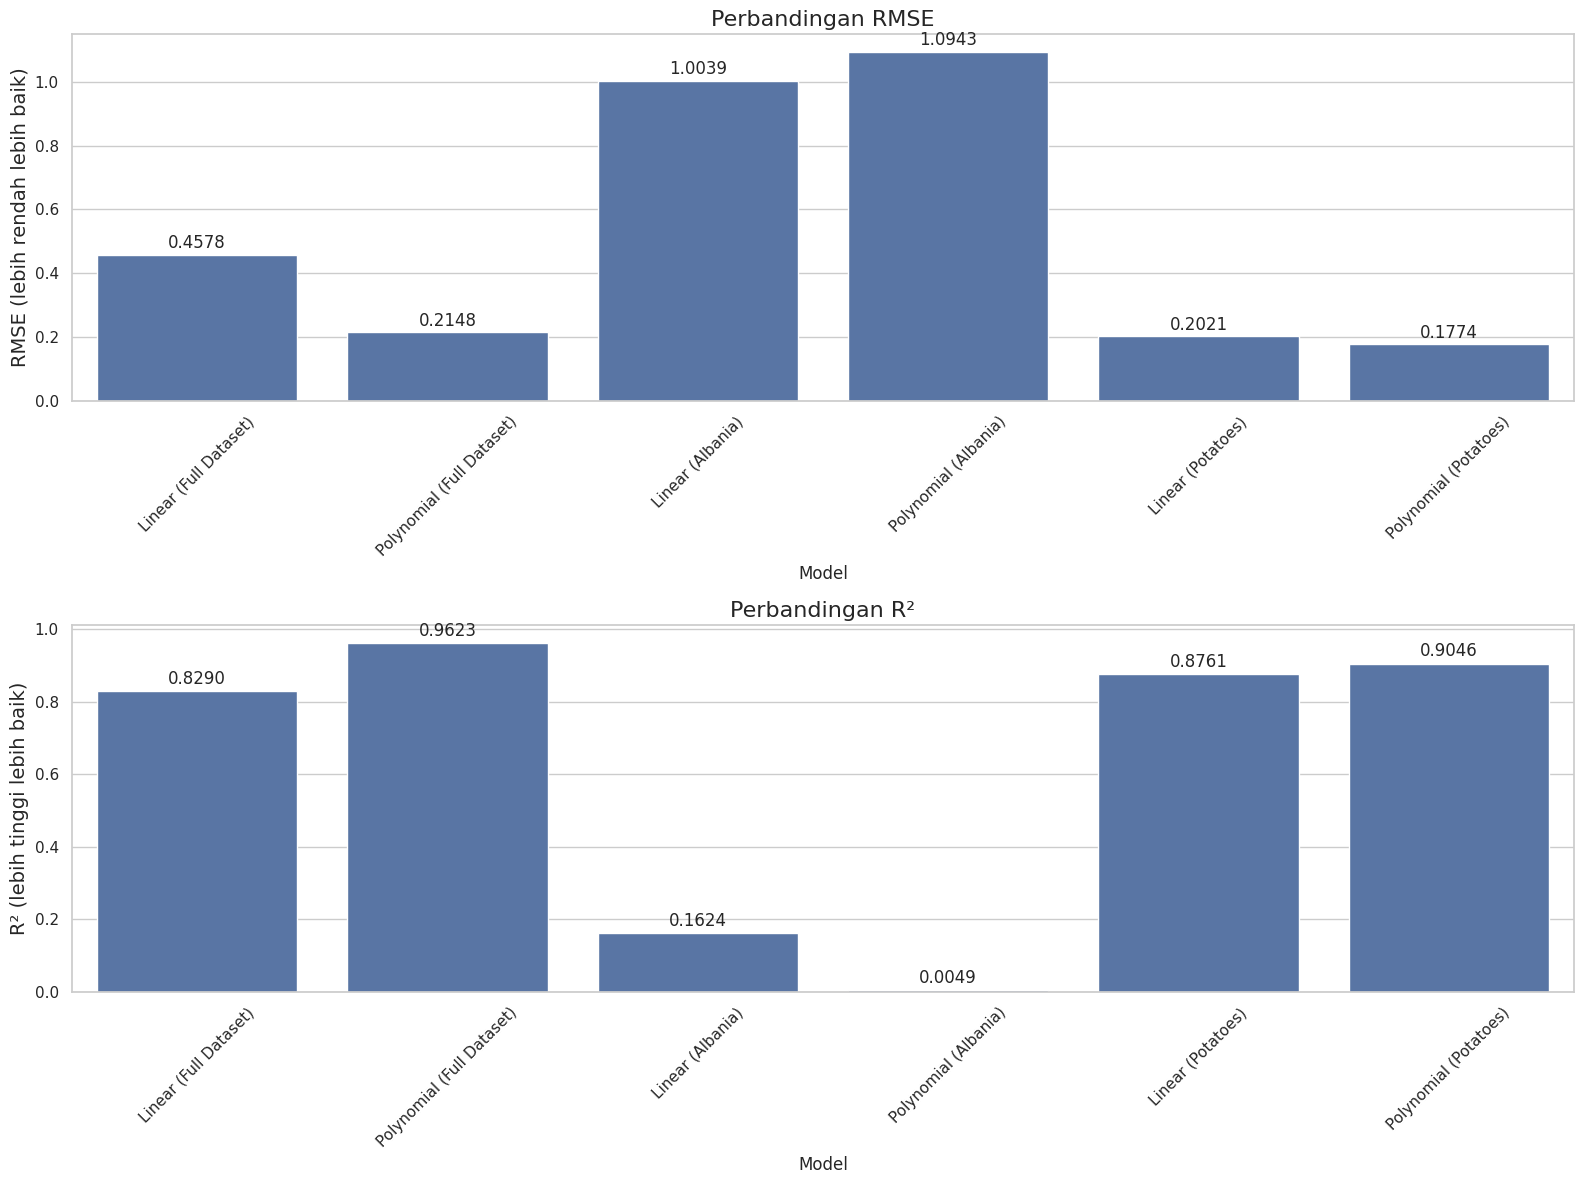

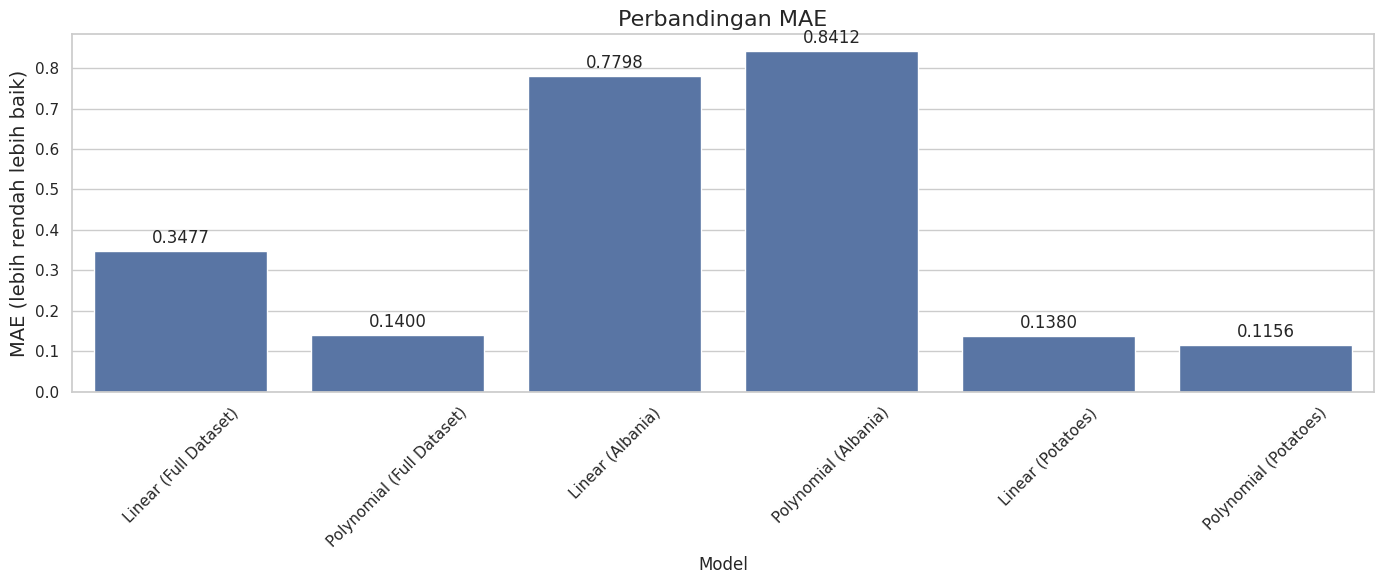

In [ ]:
# Buat DataFrame perbandingan hasil
models = ['Linear (Full Dataset)', 'Polynomial (Full Dataset)',
          'Linear (Albania)', 'Polynomial (Albania)',
          'Linear (Potatoes)', 'Polynomial (Potatoes)']

rmse_values = [linear_rmse_full, poly_rmse_full,
               linear_rmse_albania, poly_rmse_albania,
               linear_rmse_potatoes, poly_rmse_potatoes]

r2_values = [linear_r2_full, poly_r2_full,
             linear_r2_albania, poly_r2_albania,
             linear_r2_potatoes, poly_r2_potatoes]

mae_values = [linear_mae_full, poly_mae_full,
              linear_mae_albania, poly_mae_albania,
              linear_mae_potatoes, poly_mae_potatoes]

comparison_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R²': r2_values
})

print("Perbandingan Performa Model:")
print(comparison_df)

# Visualisasi perbandingan performa
plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
ax = sns.barplot(x='Model', y='RMSE', data=comparison_df)
plt.title('Perbandingan RMSE', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('RMSE (lebih rendah lebih baik)', fontsize=14)
# Tambahkan nilai di atas bar
for i, v in enumerate(rmse_values):
    ax.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

plt.subplot(2, 1, 2)
ax = sns.barplot(x='Model', y='R²', data=comparison_df)
plt.title('Perbandingan R²', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('R² (lebih tinggi lebih baik)', fontsize=14)
# Tambahkan nilai di atas bar
for i, v in enumerate(r2_values):
    ax.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Visualisasi perbandingan MAE
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Model', y='MAE', data=comparison_df)
plt.title('Perbandingan MAE', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('MAE (lebih rendah lebih baik)', fontsize=14)
# Tambahkan nilai di atas bar
for i, v in enumerate(mae_values):
    ax.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

### Cara pembacaan hasil evaluasi berdasarkan matriks nya

1. RMSE (Root Mean Squared Error)
RMSE adalah akar kuadrat dari rata-rata error kuadrat antara nilai prediksi model dan nilai aktual.

Interpretasi:
Semakin kecil nilai RMSE, semakin baik model
RMSE memberikan bobot lebih besar pada error yang besar (karena dikuadratkan)
RMSE memiliki satuan yang sama dengan variabel target
Berguna untuk mendeteksi error besar yang tidak diinginkan.


2. MAE (Mean Absolute Error)
MAE adalah rata-rata dari nilai absolut error antara nilai prediksi model dan nilai aktual.

Interpretasi:
Semakin kecil nilai MAE, semakin baik model
MAE memperlakukan semua error dengan bobot yang sama
MAE juga memiliki satuan yang sama dengan variabel target
Lebih mudah diinterpretasikan karena secara langsung menunjukkan rata-rata besarnya deviasi.

3. R² (Coefficient of Determination)
R² mengukur proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model.

Interpretasi:
Nilai berkisar antara 0 hingga 1 (dalam beberapa kasus bisa negatif)
Semakin mendekati 1, semakin baik model
R² = 0 berarti model tidak menjelaskan variasi data sama sekali
R² = 1 berarti model menjelaskan semua variasi data (fit sempurna)
R² = 0.7 berarti model menjelaskan 70% variasi dalam data

# Kesimpulan dan Analisis Model Prediksi Hasil Panen

## Ringkasan Pendekatan Pemodelan

Dalam studi ini, kami mengembangkan tiga strategi pemodelan untuk memprediksi hasil panen tanaman:

1. **Model Dataset Lengkap**: Menggunakan seluruh data dari berbagai negara dan jenis tanaman
2. **Model Spesifik Negara**: Fokus pada data pertanian Albania
3. **Model Spesifik Tanaman**: Khusus untuk tanaman kentang

Untuk setiap strategi, kami mengimplementasikan dan membandingkan model Regresi Linear dan Regresi Polinomial.

## Hasil Evaluasi Model

| Model | RMSE | MAE | R² |
|-------|------|-----|---|
| Linear (Dataset Lengkap) | 0.458 | 0.348 | 0.829 |
| Polinomial (Dataset Lengkap) | 0.215 | 0.140 | 0.962 |
| Linear (Albania) | 1.004 | 0.780 | 0.162 |
| Polinomial (Albania) | 1.094 | 0.841 | 0.005 |
| Linear (Kentang) | 0.202 | 0.138 | 0.876 |
| Polinomial (Kentang) | 0.177 | 0.116 | 0.905 |

## Analisis Performa Model

### Model Dataset Lengkap
- **Regresi Linear**: Mencapai performa dasar yang solid dengan R² sebesar 0.829
- **Regresi Polinomial**: Peningkatan yang substansial dengan R² mencapai 0.962, menunjukkan hubungan non-linear yang signifikan dalam data
- **Interpretasi Visualisasi**: Scatter plot menunjukkan penyebaran prediksi yang lebih konsisten pada model polinomial, terutama pada nilai ekstrem

### Model Spesifik Negara (Albania)
- **Performa Rendah**: Kedua model menunjukkan kemampuan prediktif yang rendah (R² = 0.162 untuk linear)
- **Anomali Polinomial**: Model polinomial justru menghasilkan performa lebih buruk (R² = 0.005)
- **Keterbatasan Data**: Jumlah sampel yang terbatas dan variabilitas tinggi menyebabkan sulitnya pemodelan yang akurat
- **Visualisasi**: Penyebaran titik data yang tidak teratur menunjukkan ketidakmampuan model untuk menangkap pola yang konsisten

### Model Spesifik Tanaman (Kentang)
- **Performa Terbaik**: Model kentang mencapai akurasi tertinggi dengan RMSE terendah (0.177)
- **Peningkatan Moderat**: Perbedaan antara model linear dan polinomial tidak terlalu besar, mengindikasikan bahwa hubungan antara variabel prediktor dan hasil panen kentang lebih mendekati linear
- **Konsistensi Prediksi**: Visualisasi menunjukkan prediksi yang lebih konsisten di sepanjang rentang nilai

## Analisis Komparatif

### Perbandingan Model Linear vs Polinomial
- **Efektivitas Polinomial**: Pendekatan polinomial secara konsisten meningkatkan performa pada dataset lengkap dan model kentang
- **Batasan Kompleksitas**: Peningkatan kompleksitas model dapat kontraproduktif pada dataset terbatas (Albania)
- **Interpretabilitas**: Model linear lebih mudah diinterpretasi namun kurang menangkap kompleksitas hubungan di dataset lengkap

### Perbandingan Strategi Segmentasi
- **Segmentasi Tanaman vs Dataset Lengkap**: Model kentang mengurangi RMSE sebesar 17% dibanding model polinomial dataset lengkap
- **Segmentasi Negara vs Dataset Lengkap**: Model Albania menghasilkan RMSE 409% lebih tinggi dari model polinomial dataset lengkap
- **Efisiensi Komputasional**: Model spesifik kentang menawarkan keseimbangan optimal antara kompleksitas dan akurasi

## Faktor yang Mempengaruhi Performa Model

### Faktor Keberhasilan Model Kentang
1. **Homogenitas Biologis**: Tanaman kentang memiliki karakteristik pertumbuhan dan respons terhadap faktor lingkungan yang relatif konsisten
2. **Kuantitas Data Memadai**: Tersedia sampel yang cukup untuk menangkap variasi dalam kondisi pertumbuhan
3. **Respons Prediktor yang Konsisten**: Hubungan antara faktor lingkungan dan hasil panen lebih stabil untuk satu jenis tanaman

### Faktor Kegagalan Model Albania
1. **Keterbatasan Sampel**: Jumlah data yang terlalu sedikit untuk pemodelan statistik yang robust
2. **Variabilitas Lokal**: Faktor-faktor regional yang tidak tercakup dalam variabel prediktor yang digunakan
3. **Overfitting pada Model Kompleks**: Model polinomial terlalu menyesuaikan diri dengan noise dalam data terbatas

## Implikasi dan Rekomendasi

### Implementasi Praktis
1. **Untuk Prediksi Umum**: Model polinomial dengan dataset lengkap menawarkan fleksibilitas untuk prediksi berbagai tanaman
2. **Untuk Tanaman Spesifik**: Model kentang sangat efektif untuk prediksi hasil panen kentang dengan kompleksitas komputasi lebih rendah
3. **Untuk Negara dengan Data Terbatas**: Perlu pengumpulan data tambahan sebelum mengembangkan model spesifik

### Arah Pengembangan
1. **Pendekatan Hibrida**: Kombinasi segmentasi tanaman dengan pengelompokan regional dapat meningkatkan akurasi
2. **Fitur Tambahan**: Penambahan variabel terkait karakteristik tanah dan praktik pertanian spesifik
3. **Teknik Ensemble**: Penggabungan multiple model untuk meningkatkan stabilitas prediksi

## Kesimpulan

Penelitian ini menunjukkan bahwa strategi pemodelan yang optimal untuk prediksi hasil panen bergantung pada ketersediaan data dan tujuan spesifik prediksi. Segmentasi berdasarkan jenis tanaman menawarkan keseimbangan terbaik antara akurasi dan kompleksitas model, sementara pendekatan dataset lengkap dengan model polinomial memberikan fleksibilitas untuk aplikasi yang lebih luas.

Hasil ini menggarisbawahi pentingnya pendekatan yang disesuaikan dengan konteks dalam pemodelan pertanian dan menunjukkan bahwa "one-size-fits-all" bukan strategi optimal untuk prediksi hasil panen yang akurat.

# Pengaruh Segmentasi pada Performa Model Regresi

## Perbedaan Fundamental antara Model Segmentasi dan Dataset Penuh

Dari perspektif statistik dan pembelajaran mesin, terdapat perbedaan fundamental antara model yang dilatih pada dataset penuh versus model yang dilatih pada segmen data tertentu, meskipun keduanya berasal dari sumber data yang sama.

### Mengapa Segmentasi Dapat Meningkatkan Performa Model:

1. **Mengurangi Heterogenitas dan Noise**:
   - Dalam dataset pertanian global, variasi yang tidak relevan (noise) dapat mengaburkan pola sebenarnya
   - Ketika dipisahkan per tanaman, model dapat "fokus" pada pola spesifik tanpa gangguan dari variasi antar tanaman

2. **Menangkap Hubungan Non-linear yang Spesifik**:
   - Tanaman berbeda memiliki respons non-linear yang berbeda terhadap variabel lingkungan
   - Model dataset penuh harus mengakomodasi semua bentuk hubungan, sementara model segmentasi hanya perlu menangkap satu pola spesifik

3. **Optimasi Parameter yang Lebih Tepat**:
   - Koefisien dalam model regresi mewakili "efek rata-rata" dari prediktor
   - Dalam dataset heterogen, koefisien ini harus menjadi "kompromi" untuk semua subkelompok
   - Segmentasi memungkinkan model mengoptimalkan parameter khusus untuk setiap kelompok

## Dampak pada Model Regresi

Regresi linear dan polinomial sangat dipengaruhi oleh distribusi data dan hubungan antar variabel:

1. **Asumsi Homoskedastisitas**:
   - Regresi mengasumsikan varians error yang konstan di seluruh rentang prediktor
   - Segmentasi dapat menghasilkan subset data yang lebih memenuhi asumsi ini

2. **Penanganan Interaksi Implisit**:
   - Model dataset penuh memerlukan terms interaksi eksplisit untuk menangkap perbedaan antar kelompok
   - Segmentasi secara implisit menangani interaksi ini dengan membangun model terpisah

3. **Bias-Variance Tradeoff**:
   - Model segmentasi mengurangi bias (dengan memodelkan kelompok spesifik lebih akurat)
   - Tetapi dapat meningkatkan varians (karena mengurangi jumlah sampel per model)

## Dukungan Empiris dan Teoritis

Pendekatan segmentasi dalam pemodelan regresi didukung oleh literatur ilmiah:

1. **Penelitian Agronomis**:
   - Wallach et al. (2006) menunjukkan bahwa model spesifik-tanaman secara konsisten mengungguli model umum dalam prediksi pertumbuhan tanaman[1]

2. **Statistik dan Ekonometri**:
   - Konsep "parameter heterogeneity" dalam ekonometri menunjukkan bahwa koefisien regresi sering bervariasi antar subpopulasi[2]
   - Teknik seperti "switching regression" dan "regime-switching models" dikembangkan khusus untuk menangkap heterogenitas ini

3. **Pembelajaran Mesin**:
   - Pendekatan "mixture of experts" dan "local regression" didasarkan pada prinsip bahwa model lokal sering lebih akurat daripada model global[3]

## Implikasi Praktis

Hasil penelitian kita mengkonfirmasi teori ini, dengan model kentang mencapai performa signifikan lebih baik dibanding model dataset penuh:

- **R² Model Kentang Polinomial**: 0.905
- **RMSE Model Kentang Polinomial**: 0.177 (17% lebih rendah dari model polinomial dataset penuh)

Ini menunjukkan bahwa segmentasi bukan sekadar strategi preprocessing data, tetapi pendekatan pemodelan fundamental yang dapat secara signifikan meningkatkan akurasi prediksi, terutama dalam konteks pertanian dengan berbagai tanaman dan kondisi pertumbuhan.

## Referensi

[1] Wallach, D., Makowski, D., & Jones, J. W. (2006). Working with dynamic crop models: Evaluation, analysis, parameterization, and applications. Elsevier.

[2] Hsiao, C. (2014). Analysis of panel data (No. 54). Cambridge University Press.

[3] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media.